## Valence-Arousal Prediction Audio and Visual Features

The Mediaeval 2017 Emotional Impact of Movies Task includes the data in the emotional domain 
(valence - arousal  regression) and  fear ( binary classification).
We have displayed the valence and arousal of all the movies in the dataset.
Also the time of the movie where fear is present is specified with the value of the second.
According to the Russell's circumplex model we were expectinf the "FEAR" to be appeared in the negative vallence, positive arousal part of the circumflex.
However in some movies, we can see that frightment exists in positive valence with negative arousal also.


In [1]:

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.colors as colors


import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

import numpy as np
import pylab as pl
import re, fileinput
import os.path
import glob
import pickle
import sys


In [2]:
import numpy as np 
print(np.__version__) 
print(np.__path__)


1.11.3
['/home/yt/anaconda2/lib/python2.7/site-packages/numpy']


In [3]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr


In [34]:
#Dev data
#movieNames = ['After_The_Rain','Attitude_Matters','Barely_legal_stories','Between_Viewings','Big_Buck_Bunny','Chatter','Cloudland','Damaged_Kung_Fu','Decay','Elephant_s_Dream','First_Bite','Full_Service','Islands','Lesson_Learned','Norm','Nuclear_Family','On_time','Origami','Parafundit','Payload','Riding_The_Rails','Sintel','Spaceman','Superhero','Tears_of_Steel','The_room_of_franz_kafka','The_secret_number','To_Claire_From_Sonny','Wanted','You_Again']

pathcontinuous = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/ContinuousLIRIS-ACCEDE/"
continuousAnnotationsFolder = pathcontinuous +'continuous-annotations/'
devdatacontinous =  pathcontinuous + "continuous-movies/"
pathcontfeatures = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"

datahome = '/home/yt/Desktop/mediaeval2017'

med2017visualFeaturesfolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Visual_features/MEDIAEVAL17-DevSet-Visual_features/features/'
med2017audiofolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Audio_features/MEDIAEVAL17-DevSet-Audio_features/features/'
med2017annotationsFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Fear-annotations/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'
med2017dataFolder = devdatacontinous

### Test Data

med2017visualFeaturesfolderTest='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Visual_features/MEDIAEVAL17-TestSet-Visual_features/visual_features/'
med2017audiofolderTest = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Audio_features/MEDIAEVAL17-TestSet-Audio_features/audio_features/'
med2017datafolderTest = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Data/MEDIAEVAL17-TestSet-Data/data/'

med2017testfeatures = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"


In [9]:
files = glob.glob(med2017datafolderTest+'*')
testmovieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [10]:
files = glob.glob(med2017dataFolder+'*')
movieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [11]:
movieNames,testmovieNames

(['After_The_Rain',
  'Attitude_Matters',
  'Barely_legal_stories',
  'Between_Viewings',
  'Big_Buck_Bunny',
  'Chatter',
  'Cloudland',
  'Damaged_Kung_Fu',
  'Decay',
  'Elephant_s_Dream',
  'First_Bite',
  'Full_Service',
  'Islands',
  'Lesson_Learned',
  'Norm',
  'Nuclear_Family',
  'On_time',
  'Origami',
  'Parafundit',
  'Payload',
  'Riding_The_Rails',
  'Sintel',
  'Spaceman',
  'Superhero',
  'Tears_of_Steel',
  'The_room_of_franz_kafka',
  'The_secret_number',
  'To_Claire_From_Sonny',
  'Wanted',
  'You_Again'],
 ['MEDIAEVAL17_00',
  'MEDIAEVAL17_01',
  'MEDIAEVAL17_02',
  'MEDIAEVAL17_03',
  'MEDIAEVAL17_04',
  'MEDIAEVAL17_05',
  'MEDIAEVAL17_06',
  'MEDIAEVAL17_07',
  'MEDIAEVAL17_08',
  'MEDIAEVAL17_09',
  'MEDIAEVAL17_10',
  'MEDIAEVAL17_11',
  'MEDIAEVAL17_12',
  'MEDIAEVAL17_13'])

In [12]:
fpsMovie = [['After_The_Rain',23.976],
            ['Attitude_Matters',29.97],
            ['Barely_legal_stories',23.976],
            ['Between_Viewings',25],
            ['Big_Buck_Bunny',24],
            ['Chatter',24],
                ['Cloudland',25],
                ['Damaged_Kung_Fu',25],
                ['Decay',23.976],
                ['Elephant_s_Dream',24],
                ['First_Bite',25],
                ['Full_Service',29.97],
                ['Islands',23.976],
                ['Lesson_Learned',29.97],
                ['Norm',25],
                ['Nuclear_Family',23.976],
                ['On_time',30],
                ['Origami',24],
                ['Parafundit',24],
                ['Payload',25],
                ['Riding_The_Rails',23.976],
                ['Sintel',24],
                ['Spaceman',23.976],
                ['Superhero',29.97],
                ['Tears_of_Steel',24],
                ['The_room_of_franz_kafka',29.786],
                ['The_secret_number',23.976],
                ['To_Claire_From_Sonny',23.976],
                ['Wanted',25],
                ['You_Again',29.97]]

contmoviesfps = pd.DataFrame(fpsMovie,columns=['name','fps'])
#contmoviesfps.set_index('name', inplace=True)
#contmoviesfps.index.name = None
#contmoviesfps['After_The_Rain']

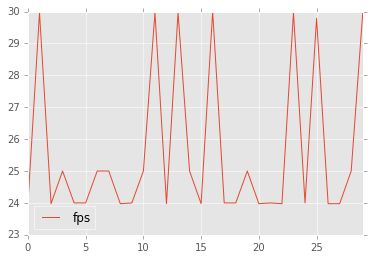

In [13]:
contmoviesfps.plot.line()

In [41]:
contmoviesfps['f'] = np.round(contmoviesfps['fps'])
contmoviesfps

name     fps     f
0            After_The_Rain  23.976  24.0
1          Attitude_Matters  29.970  30.0
2      Barely_legal_stories  23.976  24.0
3          Between_Viewings  25.000  25.0
4            Big_Buck_Bunny  24.000  24.0
5                   Chatter  24.000  24.0
6                 Cloudland  25.000  25.0
7           Damaged_Kung_Fu  25.000  25.0
8                     Decay  23.976  24.0
9          Elephant_s_Dream  24.000  24.0
10               First_Bite  25.000  25.0
11             Full_Service  29.970  30.0
12                  Islands  23.976  24.0
13           Lesson_Learned  29.970  30.0
14                     Norm  25.000  25.0
15           Nuclear_Family  23.976  24.0
16                  On_time  30.000  30.0
17                  Origami  24.000  24.0
18               Parafundit  24.000  24.0
19                  Payload  25.000  25.0
20         Riding_The_Rails  23.976  24.0
21                   Sintel  24.000  24.0
22                 Spaceman  23.976  24.0
23                Superhero  29.970  30.0
24           Tears_of_Steel  24.000  24.0
25  The_room_of_franz_kafka  29.786  30.0
26        The_secret_number  23.976  24.0
27     To_Claire_From_Sonny  23.976  24.0
28                   Wanted  25.000  25.0
29                You_Again  29.970  30.0

In [43]:
def getfps(movname):
    return contmoviesfps[ contmoviesfps.name == movname ]['f']

In [44]:
print contmoviesfps[ contmoviesfps.name == 'You_Again' ]['f']
print getfps('You_Again')

29    30.0
Name: f, dtype: float64
29    30.0
Name: f, dtype: float64


In [18]:
movgroups_wodecay = {
    0:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    1:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    2:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    3:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    4:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    5:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload']
}

movgroups = {
    0:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    1:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    2:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    3:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    4:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    5:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload'],
    6:['Decay']
}

mov2groups = {
    0:['Decay'],
    1:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    2:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    3:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    4:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    5:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    6:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload'],
}


def gettraintestmovielist(mlist,groups=movgroups):
    testlist = groups[mlist]
    trainlist =[]
    for idx, group in enumerate(groups):
        if idx != mlist:
            for g in groups[idx]:
                trainlist.append(g)
    return trainlist, testlist

def gettraintest2movielist(foldno,groups=mov2groups):
    if foldno==1:
        mlist=[1,2]
    elif foldno==2:
        mlist=[3,4]
    elif foldno==3:
        mlist=[5,6]
    elif foldno==4:
        mlist=[2,3]
    elif foldno==5:
        mlist=[4,5]
    else:
        mlist=[]
    
    testlist = [] 
    for i in mlist:
        for f in groups[i]:
            testlist.append(f)
            
    trainlist =[]
    for idx, group in enumerate(groups):
        for f in groups[idx]:
            if f not in testlist:
                trainlist.append(f)
                
    return trainlist, testlist

In [19]:
gettraintest2movielist(4)


(['Decay',
  'You_Again',
  'Damaged_Kung_Fu',
  'The_secret_number',
  'Spaceman',
  'Islands',
  'To_Claire_From_Sonny',
  'Nuclear_Family',
  'After_The_Rain',
  'Parafundit',
  'The_room_of_franz_kafka',
  'Attitude_Matters',
  'Lesson_Learned',
  'Superhero',
  'First_Bite',
  'Wanted',
  'Between_Viewings',
  'Barely_legal_stories',
  'Payload'],
 ['Cloudland',
  'Origami',
  'Riding_The_Rails',
  'Tears_of_Steel',
  'Sintel',
  'On_time',
  'Elephant_s_Dream',
  'Norm',
  'Big_Buck_Bunny',
  'Chatter',
  'Full_Service'])

## Valence - Arosal Annotations
Thank you for downloading LIRIS-ACCEDE dataset.
This file contains valence/arousal annotations for the LIRIS-ACCEDE continuous part that is used for the first subtask of the MEDIAEVAL 2017 Emotional Impact of Movies task.
For each of the 30 movies, consecutive ten seconds-segments sliding over the whole movie with a shift of 5 seconds are considered and provided with valence and arousal annotations.
Each txt file contains 4 columns separated by tabulations. The first column is the segment id, starting from 0, the second column is the starting time of the segment in the movie and the third and fourth columns are respectively the valence and arousal values for this segment.

In [20]:
def getAnnotationDf(movname,folder=med2017annotationsFolder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f759d3de9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f759ce2e610>]], dtype=object)

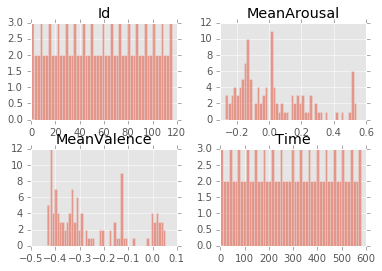

In [22]:
df = getAnnotationDf(movieNames[0])
df.hist(alpha=0.5,bins=50)

In [23]:
#df.head()
#df.describe()

## Valence, Arousal histogram plots for Dev-Set

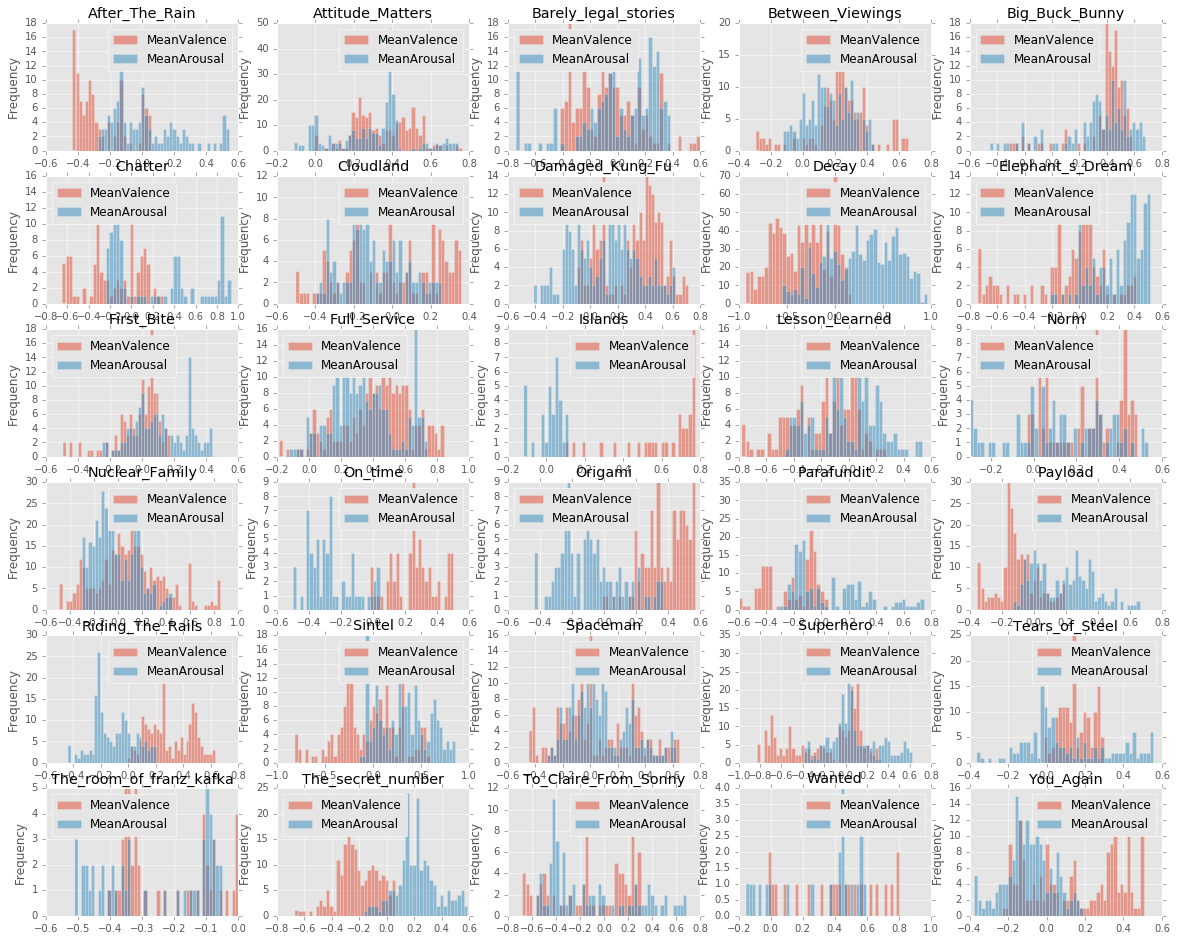

In [24]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    if (ii+1 > 30):
        plt.subplot(6,5,ii)
    else :
        plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot.hist(ax=plt.gca(),title=mov,alpha=0.5,bins=50)

## Valence , Arousal plots for Dev-Set

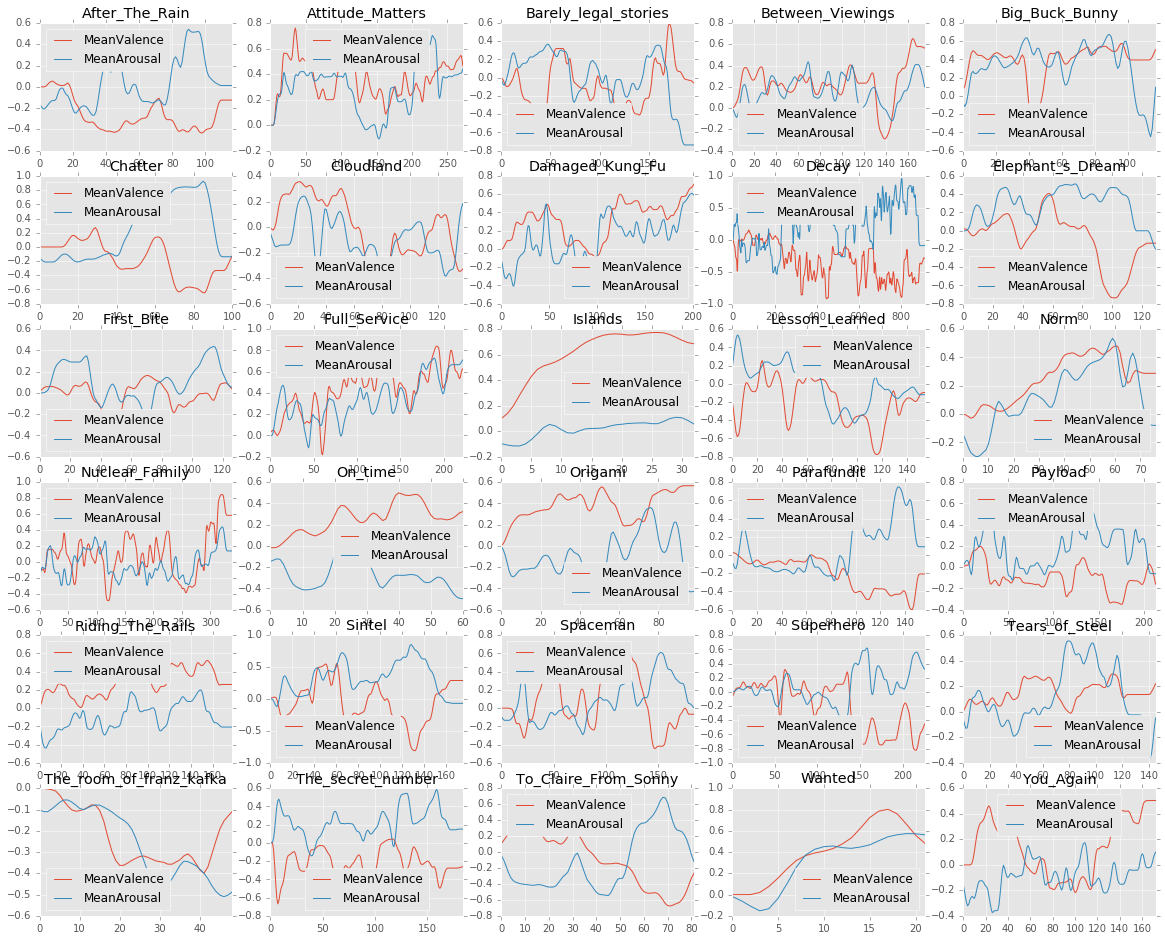

In [25]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    #.hist(alpha=0.5,bins=50)


## Fear Annotations

In [26]:
def getFearDf(movname):
    filename = os.path.join(med2017fearFolder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df


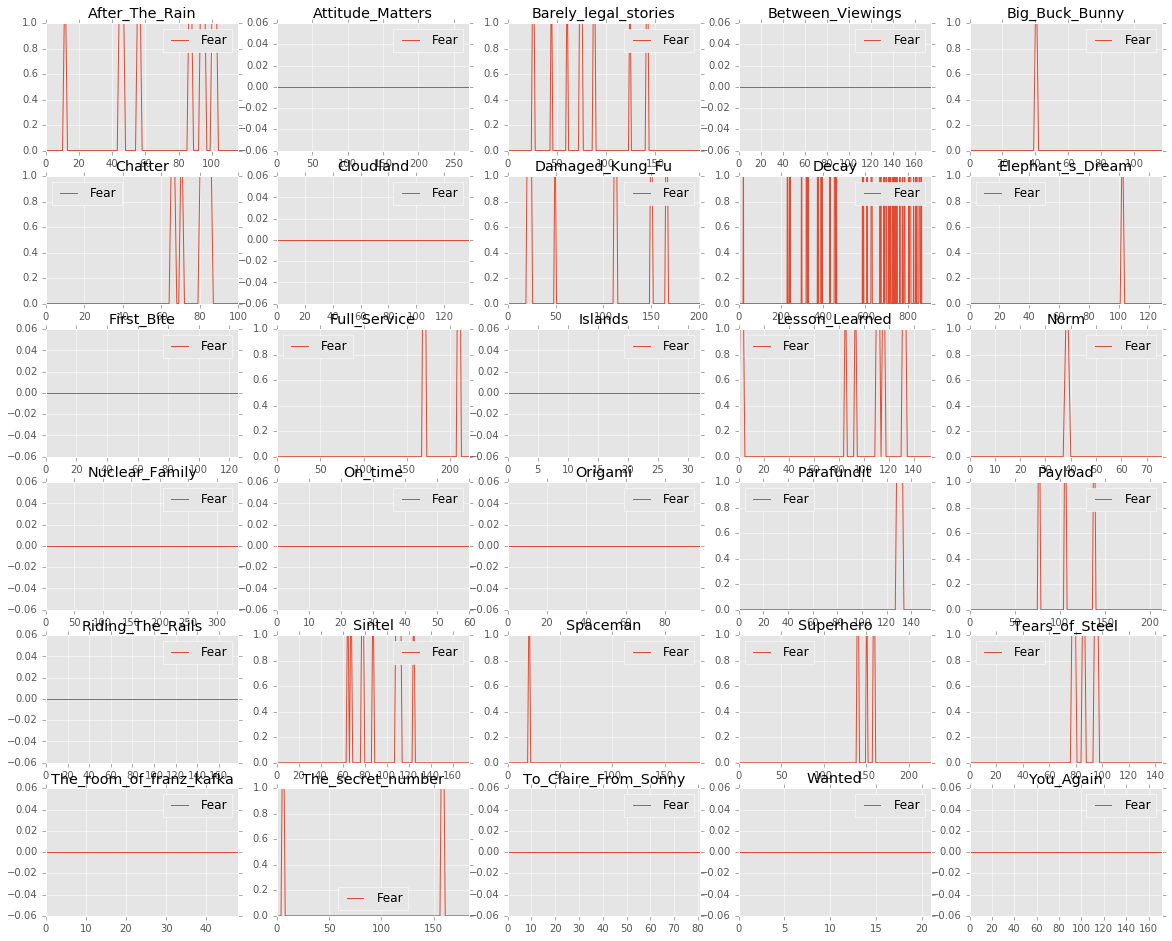

In [27]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getFearDf(mov)
    df[['Fear']].plot(ax=plt.gca(),title=mov)

## Audio Features


In [28]:
def getAudioDf(moviename,folder=med2017audiofolder):
    if 'TestSet' in folder:
        files = glob.glob(folder+moviename+'/audio_features/*.csv')
    else:
        files = glob.glob(folder+moviename+'/*.csv')
    files = sorted(files)
    files
    alist = []
    for fname in files:
        f=open(fname,'r')
        h = []
        for l in f :
            if '@attribute' in l:
                h.append(l.split()[1])
            elif l == '\n':
                l
            elif l[0] =='@':
                l
            else:
                alist.append(map(float,l.split(',')[1:])) #first attribute is string ,skipped
        f.close()
    
    return pd.DataFrame(alist,columns=h[1:])

## Visual Features

In [29]:
visual_feat = ['acc', 'cedd', 'cl', 'eh', 'fc6', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
visual_feat_wofc16 = ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [30]:
def getVisFeatureDf(moviename,typename,folder=med2017visualFeaturesfolder):
    files = glob.glob(folder+moviename+'/'+typename+'/*.txt')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        for l in f:
            alist.append(map(float,l.split(',')))
        f.close()
    return pd.DataFrame(alist)

def getAvgVisFeatureDf(moviename,typename,folder=med2017visualFeaturesfolder):
    df = getVisFeatureDf(moviename,typename,folder)
    dfwindow = df.rolling(10).mean()[9::5] ############### start with 9
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    return dfwindow

def getAvgVisFeatListDf(moviename,featlist,folder=med2017visualFeaturesfolder):
    df = getVisFeatureDf(moviename,featlist[0],folder)
    for feat in featlist[1:]:
        tdf = getVisFeatureDf(moviename,feat,folder)
        df = pd.concat([df,tdf],axis=1)
    
    dfwindow = df.rolling(10).mean()[9::5] ############### start with 9
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow.columns=list(range(len(dfwindow.columns)))
    return dfwindow

In [31]:
sum([len(getAnnotationDf(m)) for m in movieNames ])

5274

In [30]:
sum([len(getAudioDf(m)) for m in movieNames ])

5264

In [31]:
sum([len(getVisFeatureDf(m,'cl')) for m in movieNames ])

26589

In [32]:
sum([len(getAvgVisFeatureDf(m,'cl')) for m in movieNames ])

5271

In [61]:
df = getVisFeatureDf(movieNames[0],'cl')
#df = getAvgVisFeatureDf(movieNames[0],'cl')
#df = getAvgVisFeatListDf(movieNames[0],['cl','eh'])
#df.hist()
df.head(10)

0     1     2     3     4     5     6     7     8     9   ...     23  \
0   2.0  16.0  16.0  16.0  16.0  16.0  16.0  16.0  16.0  16.0  ...   16.0   
1   2.0  15.0  15.0  16.0  16.0  16.0  15.0  15.0  15.0  16.0  ...   16.0   
2  15.0  16.0  14.0  14.0  16.0  16.0  16.0  15.0  16.0  15.0  ...   16.0   
3   6.0  17.0  15.0   8.0  16.0  12.0  18.0  16.0  16.0  16.0  ...   15.0   
4   3.0  16.0  15.0  11.0  16.0  12.0  16.0  16.0  15.0  16.0  ...   16.0   
5   4.0  14.0  16.0  13.0  15.0  13.0  16.0  15.0  16.0  15.0  ...   15.0   
6   3.0  14.0  16.0  13.0  15.0  12.0  16.0  15.0  16.0  15.0  ...   16.0   
7   4.0  14.0  16.0  13.0  15.0  12.0  16.0  15.0  16.0  15.0  ...   16.0   
8   4.0  14.0  16.0  13.0  15.0  12.0  16.0  15.0  16.0  15.0  ...   16.0   
9   3.0  15.0  16.0  13.0  15.0  12.0  16.0  15.0  16.0  15.0  ...   16.0   

     24    25    26    27    28    29    30    31    32  
0  16.0  16.0  16.0  32.0  16.0  16.0  16.0  16.0  16.0  
1  16.0  16.0  16.0  31.0  16.0  16.0  16.0  16.0  16.0  
2  15.0  16.0  16.0  21.0  15.0  16.0  16.0  16.0  16.0  
3  15.0  16.0  15.0  27.0  15.0  16.0  17.0  15.0  17.0  
4  15.0  16.0  15.0  30.0  16.0  16.0  17.0  16.0  16.0  
5  16.0  15.0  15.0  29.0  16.0  16.0  16.0  16.0  16.0  
6  16.0  16.0  16.0  31.0  16.0  16.0  16.0  16.0  16.0  
7  16.0  16.0  16.0  31.0  16.0  16.0  16.0  16.0  16.0  
8  16.0  16.0  16.0  31.0  16.0  16.0  16.0  16.0  16.0  
9  16.0  16.0  16.0  31.0  16.0  16.0  16.0  16.0  16.0  

[10 rows x 33 columns]

In [18]:
#df = getAvgVisFeatListDf(movieNames[0],['fc6'])
#df = getVisFeatureDf(movieNames[0],'fc6')
#df.describe()

## Low Level Cinematographic Features
fps değerlerine göre, feature çıkarma key frame seçme ve averaging tekrar yapılacak.

In [81]:
def getLowFeatureDf(movname):
    fname = movname +'.mp4continous_features.txt'
    df = pd.DataFrame(np.genfromtxt( os.path.join(pathcontfeatures,fname)))
    df.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
    return df

def getLowFeature10SecDf(movname):
    pdf = getLowFeatureDf(movname)
    fps = getfps(movname)
    dfwindow = pdf.rolling(10).mean()[9::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow.drop('time',axis=1,inplace=True)
    return dfwindow

def getMovieListLowFeatFearDf(movieNames):
    X = getLowFeature10SecDf(movieNames[0])
    y = getFearDf(movieNames[0]).Fear[:len(X)]

    for mov in movieNames[1:]:
        tX=getLowFeatureDf(mov)
        ty=getFearDf(mov).Fear[:len(tX)]
        X = X.append(tX)
        y = y.append(ty)
        if (X.shape != y.shape):
            print mov, X.shape, y.shape
    return X,y

In [70]:
#getLowFeatureDf(movieNames[1]).head(10)[2::2]

In [71]:
#print getLowFeatureDf(movieNames[1]).head(10)
#print getLowFeatureDf(movieNames[1]).head(10).mean()
print getLowFeature10SecDf(movieNames[1]).head(10)

Attitude_Matters.mp4continous_features.txt
   framemean    huemean     satmean     valmean    redmean  greenmean  \
0       11.0  16.266390  108.533860   24.615390   5.417613   5.983095   
1        9.5  10.111689   65.248124   15.309475   7.196943   7.676144   
2       14.1   7.779963   10.971608   15.279160  14.210921  14.116898   
3       54.6  31.491614   36.296284   59.702565  52.819005  54.486605   
4       79.8  47.335400   74.969860   89.290460  75.284470  79.210160   
5       70.7  46.443380   82.062840   80.176950  66.029620  69.923720   
6       73.1  49.213990   78.506800   82.417040  69.214910  72.537860   
7       75.4  45.503130   70.678890   83.767210  70.378780  75.304340   
8       79.0  31.727480   83.240130   92.335810  65.965150  76.843300   
9       84.5  24.291420  101.637440  103.255080  66.305130  79.824300   

     bluemean  lummean     motion  
0   24.605360      0.7  26.035474  
1   15.304023      0.1   4.688359  
2   14.986898      6.0  10.187818  
3   57.09

## Train and Test set creation

In [85]:
def getFeatureswFearDf(movieNames,featlist=visual_feat_wofc16):
    Xv = getAvgVisFeatListDf(movieNames[0],featlist)
    Xa = getAudioDf(movieNames[0])
    Xd = getAvgVisFeatListDf(movieNames[0],['fc6'])
    Xl = getLowFeature10SecDf(movieNames[0])
    y = getFearDf(movieNames[0])[['Fear']]
    
    mlen = min(len(Xv),len(Xa), len(Xd), len(Xl),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    Xd = Xd[:mlen]
    Xl = Xl[:mlen]
    y  = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatListDf(mov,featlist)
        tXa = getAudioDf(mov)
        tXd = getAvgVisFeatListDf(mov,['fc6'])
        tXl = getLowFeature10SecDf(mov)
        ty = getFearDf(mov)[['Fear']]
        
        mlen = min(len(tXv),len(tXa),len(tXd),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        tXd = tXd[:mlen]
        tXl = tXl[:mlen]
        ty = ty[:mlen]
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        Xd = Xd.append(tXd)
        Xl = Xl.append(tXl)
        y  = y.append(ty)
        
    return Xv,Xa,Xd,Xl,y

In [77]:
def getFeatureswAnnotationsDf(movieNames,featlist=visual_feat_wofc16):
    Xv = getAvgVisFeatListDf(movieNames[0],featlist)
    Xa = getAudioDf(movieNames[0])
    Xd = getAvgVisFeatListDf(movieNames[0],['fc6'])
    Xl = getLowFeature10SecDf(movieNames[0])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa), len(Xd), len(Xl),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    Xd = Xd[:mlen]
    Xl = Xl[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatListDf(mov,featlist)
        tXa = getAudioDf(mov)
        tXd = getAvgVisFeatListDf(mov,['fc6'])
        tXl = getLowFeature10SecDf(mov)
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(tXd),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        tXd = tXd[:mlen]
        tXl = tXl[:mlen]
        ty = ty[:mlen]
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        Xd = Xd.append(tXd)
        Xl = Xl.append(tXl)
        y  = y.append(ty)
        
    return Xv,Xa,Xd,Xl,y

In [73]:
def getMovListAudioVisFeatListwAnnotationsDf(movieNames,featlist):
    Xv = getAvgVisFeatureDf(movieNames[0],featlist[0])
    Xa = getAudioDf(movieNames[0])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa),len(y))
    print(mlen)
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for feattype in featlist[1:]:
        fXv = getAvgVisFeatureDf(movieNames[0],feattype)[:mlen]
        Xv = pd.concat( [Xv,fXv], axis=1 )

    for mov in movieNames[1:]:
        tXv = getAvgVisFeatureDf(mov,featlist[0])
        tXa = getAudioDf(mov)
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(ty))
        print(mlen)
        
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
        
        for feattype in featlist[1:]:
            fXv = getAvgVisFeatureDf(mov,feattype)[:mlen]
            tXv = pd.concat( [tXv,fXv], axis=1 )
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [74]:
def df2mat(df):
    return df.as_matrix().reshape((len(df),))


# Classification work

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#from sklearn import cross_validation
from sklearn import metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

def getGridCV(pipe,paramgirid,Xtrain,ytrain): # scoring ?
    grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=125)
    grid.fit(Xtrain,ytrain)
    
    return grid



/home/yt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/yt/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [76]:
def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [ ]:
trainlist, testlist=gettraintest2movielist(1,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
tXv,tXa,tXd,ty = getFeatureswFearDf(trainlist)
print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
testXv, testXa, testXd, testy = getFeatureswFearDf(testlist)
print(testXv.shape, testXa.shape,testXd.shape, testy.shape)


In [ ]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}

pipegrad = GradientBoostingClassifier(learning_rate=0.05, 
                           n_estimators=60,max_depth=9,
                           max_features='sqrt', subsample=0.8, 
                           random_state=10) 

gsearch3 = GridSearchCV(pipegrad , param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch3.fit(Xtraina,ytrain)
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001, 0.01, 1, 10],
     'classifier__C': [0.01, 1, 10,100]},
    {'classifier': [RandomForestClassifier],
     'preprocessing': [None],
     'classifier__n_estimators': [50,100,300]
     'classifier__max_features': [3,5,10]}]

grid = GridSearchCV(pipe, param_grid, cv=5)
#grid.fit(Xtraina,ytrain)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
#grid.grid_scores_, grid.best_params_, grid.best_score_

In [ ]:
from joblib import Parallel, delayed

import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...

def trainPipe(ii,pipe,valorar, modality):
    
    #rows = []
    trainlist, testlist=gettraintest2movielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
    print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
    testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
    print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXv,ty[[valorar]], 
                                           testXv, testy[[valorar]])
    else:
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXa,ty[[valorar]], 
                                           testXa, testy[[valorar]])
        
    return ii,mse,prs,p1

def processGroup(ii,pipe,valorar, modality):
    
    #rows = []
    trainlist, testlist=gettraintest2movielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
    print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
    testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
    print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXv,ty[[valorar]], 
                                           testXv, testy[[valorar]])
    else:
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXa,ty[[valorar]], 
                                           testXa, testy[[valorar]])
        
    return [ii,mse,prs]

def crossgroups(pipe,valorar,modality):
    #inputs=range(len(movgroups))
    inputs=[1, 2, 3, 4, 5]
    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(delayed(processGroup)(i,pipe,valorar,modality) for i in inputs)
    pipescores = pd.DataFrame(results,columns=['test-group','MSE','PCC'])

    return pipescores


# Regression work

In [ ]:
#trainlist, testlist=gettraintestmovielist(2,movgroups_wodecay)  # index 1 olanları test , diğerlerini train yapan fonksiyon
#trainlist, testlist
#for ii in range(len(movgroups)):
#    trnlist, tstlist=gettraintestmovielist(ii)

In [92]:
%%time
allXv,allXa,allXd,ally = getFeatureswAnnotationsDf(movieNames)
print(allXv.shape,allXa.shape,allXd.shape,ally.shape)

((5264, 1271), (5264, 1583), (5264, 4096), (5264, 2))
CPU times: user 1min 41s, sys: 7.74 s, total: 1min 48s
Wall time: 2min 4s


In [78]:
trainlist, testlist=gettraintest2movielist(2)  # index 1 olanları test , diğerlerini train yapan fonksiyon

tXv,tXa,tXd,tXl,ty = getFeatureswAnnotationsDf(trainlist)
print(tXv.shape,tXa.shape,tXd.shape,tXl.shape,ty.shape)
testXv, testXa, testXd, testXl, testy = getFeatureswAnnotationsDf(testlist)
print(testXv.shape, testXa.shape,testXd.shape,testXd.shape, testy.shape)

X_train, X_test, y_train, y_test = train_test_split(tXv, ty,test_size=0.2, random_state=0)
Xa_train, Xa_test, ya_train, ya_test = train_test_split(tXa, ty,test_size=0.2, random_state=0)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(tXd, ty,test_size=0.2, random_state=0)


Decay.mp4continous_features.txt
You_Again.mp4continous_features.txt
Damaged_Kung_Fu.mp4continous_features.txt
The_secret_number.mp4continous_features.txt
Spaceman.mp4continous_features.txt
Cloudland.mp4continous_features.txt
Origami.mp4continous_features.txt
Riding_The_Rails.mp4continous_features.txt
Tears_of_Steel.mp4continous_features.txt
Sintel.mp4continous_features.txt
The_room_of_franz_kafka.mp4continous_features.txt
Attitude_Matters.mp4continous_features.txt
Lesson_Learned.mp4continous_features.txt
Superhero.mp4continous_features.txt
First_Bite.mp4continous_features.txt
Wanted.mp4continous_features.txt
Between_Viewings.mp4continous_features.txt
Barely_legal_stories.mp4continous_features.txt
Payload.mp4continous_features.txt
((3830, 1271), (3830, 1583), (3830, 4096), (3830, 9), (3830, 2))
On_time.mp4continous_features.txt
Elephant_s_Dream.mp4continous_features.txt
Norm.mp4continous_features.txt
Big_Buck_Bunny.mp4continous_features.txt
Chatter.mp4continous_features.txt
Full_Service

In [88]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(tXl, ty,test_size=0.2, random_state=0)
Xl_train.shape, Xl_test.shape, yl_train.shape, yl_test.shape

((3064, 9), (766, 9), (3064, 2), (766, 2))

## Linear Regression - Valence

In [89]:
%%time
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
visual_regr = linear_model.LinearRegression()
audio_regr = linear_model.LinearRegression()
nn_regr = linear_model.LinearRegression()
llf_regr = linear_model.LinearRegression() #low level features

# Train the model using the training sets
visual_regr.fit(X_train, y_train[['MeanValence']].as_matrix().reshape((len(y_train))))
audio_regr.fit(Xa_train, ya_train[['MeanValence']].as_matrix().reshape((len(ya_train))))
nn_regr.fit(Xd_train, yd_train[['MeanValence']].as_matrix().reshape((len(yd_train))))
llf_regr.fit(Xl_train, yl_train[['MeanValence']].as_matrix().reshape((len(yl_train))))

# Make predictions using the testing set
visual_y_pred = visual_regr.predict(X_test)
audio_y_pred = audio_regr.predict(Xa_test)
nn_y_pred = nn_regr.predict(Xd_test)
llf_y_pred = llf_regr.predict(Xl_test)



CPU times: user 46.3 s, sys: 1.55 s, total: 47.9 s
Wall time: 24.7 s


In [90]:
# The coefficients
print('Visual Coefficients: \n', visual_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(y_test[['MeanValence']]), visual_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(y_test[['MeanValence']]),visual_y_pred))

print('pearson score  ',pearsonr(df2mat(y_test[['MeanValence']]),visual_y_pred))
print
print('Audio Coefficients: \n', audio_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(ya_test[['MeanValence']]), audio_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(ya_test[['MeanValence']]),audio_y_pred))
print('pearson score  ',pearsonr(df2mat(ya_test[['MeanValence']]),audio_y_pred))
print
print('FC16 Coefficients: \n', nn_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(yd_test[['MeanValence']]), nn_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(yd_test[['MeanValence']]),nn_y_pred))

print('pearson score  ',pearsonr(df2mat(yd_test[['MeanValence']]),nn_y_pred))

print('Low Level Cinematographic: \n', llf_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(yl_test[['MeanValence']]), llf_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(yl_test[['MeanValence']]),llf_y_pred))

print('pearson score  ',pearsonr(df2mat(yl_test[['MeanValence']]),llf_y_pred))

('Visual Coefficients: \n', array([  7.92078163e-03,  -3.41034481e-03,   3.22364570e-02, ...,
        -3.31345262e-06,  -1.76522489e-04,  -2.76182347e-04]))
Mean squared error: 0.16
Variance score: -0.34
('pearson score  ', (0.60696954128786806, 2.7659845977055354e-78))

('Audio Coefficients: \n', array([  1.19360087e-02,  -2.19720263e-02,   4.39910331e+04, ...,
        -8.10105063e-04,  -1.02620160e+04,   0.00000000e+00]))
Mean squared error: 440.49
Variance score: -3768.63
('pearson score  ', (0.01525334731357187, 0.67339184361473414))

('FC16 Coefficients: \n', array([ 0.02109452, -0.00158934,  0.01713063, ..., -0.03857747,
       -0.00368451, -0.01585526]))
Mean squared error: 0.10
Variance score: 0.15
('pearson score  ', (0.70600393665133665, 1.360521357770081e-116))
('Low Level Cinematographic: \n', array([-0.07195637,  0.00135865, -0.00345067,  0.01652764, -0.00342556,
        0.03905086,  0.02084622, -0.00250101,  0.00123205]))
Mean squared error: 0.10
Variance score: 0.17
('pe

## Grid Search on Visual Features- Valence

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def getGridCV(pipe,paramgirid,Xtrain,ytrain,jobs=4): # scoring ? # jobs --> number of cores
    grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=jobs)  
    grid.fit(Xtrain,ytrain)
    
    return grid

    

In [98]:
%%time

#X_train, X_test, y_train, y_test 
#pipe = Pipeline([('preprocessing', StandardScaler()),('reduce_dim', PCA()) ,('classifier', SVR())])
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 
     'preprocessing': [StandardScaler()],
#     'reduce_dim': [PCA()],
#     'reduce_dim__n_components' : [ 800],
     'classifier__gamma': [0.0001, 0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100,200]},
    {'classifier': [RandomForestRegressor(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [3,5,10]}]

grid_vis_valence = getGridCV(pipe,param_grid,X_train,df2mat(y_train[['MeanValence']]))

print("Best params:\n{}\n".format(grid_vis_valence.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_vis_valence.best_score_))
print("All grid scores")

grid_vis_valence.grid_scores_, grid_vis_valence.best_params_, grid_vis_valence.best_score_

Best params:
{'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True), 'classifier': SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 10}

Best cross-validation score: 0.82
All grid scores
CPU times: user 29.9 s, sys: 10.9 s, total: 40.7 s
Wall time: 13min 52s


In [99]:
tXv.shape,tXa.shape,ty.shape,
testXv.shape, testXa.shape, testy.shape

((1434, 1271), (1434, 1583), (1434, 2))

In [100]:
#scores[0]
#scores.to_csv('grid_vis_valence.txt')

In [101]:
def gridscores(grid):
    scores = grid.grid_scores_
    rows = []
    params = sorted(scores[0].parameters)
    for row in scores:
        mean = row.mean_validation_score
        std = row.cv_validation_scores.std()
        rows.append([mean, std] + [row.parameters['classifier']])
    scores = pd.DataFrame(rows, columns=['mean_', 'std_'] + ['classifier'])
    #scores.to_csv(filename)
    return scores

In [105]:
gridscores(grid_vis_valence).tail()

mean_      std_                                         classifier
47 -0.008115  0.008917  SVR(C=200, cache_size=200, coef0=0.0, degree=3...
48 -0.008115  0.008917  SVR(C=200, cache_size=200, coef0=0.0, degree=3...
49  0.702275  0.022262  (DecisionTreeRegressor(criterion='mse', max_de...
50  0.714504  0.018777  (DecisionTreeRegressor(criterion='mse', max_de...
51  0.734224  0.018017  (DecisionTreeRegressor(criterion='mse', max_de...

## Grid Search on Low Level Cinematographic Features- Valence

In [93]:
%%time

#Xl_train, Xl_test, yl_train, yl_test 
#pipe = Pipeline([('preprocessing', StandardScaler()),('reduce_dim', PCA()) ,('classifier', SVR())])
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 
     'preprocessing': [StandardScaler()],
#     'reduce_dim': [PCA()],
#     'reduce_dim__n_components' : [ 800],
     'classifier__gamma': [0.0001, 0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100,200]},
    {'classifier': [RandomForestRegressor(n_estimators=20)],
     'preprocessing': [None], 'classifier__max_features': [3,5,9]}]

grid_llf_valence = getGridCV(pipe,param_grid,Xl_train,df2mat(yl_train[['MeanValence']]))

print("Best params:\n{}\n".format(grid_llf_valence.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_llf_valence.best_score_))
print("All grid scores")

grid_llf_valence.grid_scores_, grid_llf_valence.best_params_, grid_llf_valence.best_score_

Best params:
{'classifier__max_features': 9, 'preprocessing': None, 'classifier': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)}

Best cross-validation score: 0.44
All grid scores
CPU times: user 2.35 s, sys: 384 ms, total: 2.73 s
Wall time: 1min 28s


In [104]:
gridscores(grid_llf_valence).tail()

mean_      std_                                         classifier
47  0.309450  0.032391  SVR(C=200, cache_size=200, coef0=0.0, degree=3...
48  0.041772  0.020577  SVR(C=200, cache_size=200, coef0=0.0, degree=3...
49  0.420782  0.029979  (DecisionTreeRegressor(criterion='mse', max_de...
50  0.433318  0.025610  (DecisionTreeRegressor(criterion='mse', max_de...
51  0.435960  0.038782  (DecisionTreeRegressor(criterion='mse', max_de...

## Metrics and Paralell crossvalidation

In [111]:
from sklearn import metrics
from scipy.stats import pearsonr

def getMetrics(y,y_pred):
    # calculate MAE using scikit-learn
    #mae = metrics.mean_absolute_error(ytestarray, y_pred)
    #print("MAE score: {:.5f}".format(mae))
    
    mse = metrics.mean_squared_error(y, y_pred)
    # calculate MSE using scikit-learn
    print("MSE score: {:.5f}".format(mse))

    # calculate RMSE using scikit-learn
    #print("RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(ytestarray, y_pred))))

    print("Pearson score:")
    prs = pearsonr(y,y_pred)
    print(prs)
    
    return mse,prs

In [112]:
def evaluate_pipe(pipe,trainX,trainy,testX,testy):
    
    ytrainarray = trainy.as_matrix().reshape((len(trainy),))
    ytestarray = testy.as_matrix().reshape((len(testy),))

    pipe.fit(trainX, ytrainarray)
    
    print("Train score: {:.2f}".format(pipe.score(trainX, ytrainarray)))
    print("Test score: {:.2f}".format(pipe.score(testX, ytestarray)))

    y_pred = pipe.predict(testX)

    mse, prs = getMetrics(ytestarray,y_pred)
    
    return y_pred,mse,prs[0],pipe

In [113]:
from joblib import Parallel, delayed

import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...

def trainPipe(ii,pipe,valorar, modality):
    
    #rows = []
    trainlist, testlist=gettraintest2movielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,tXl,ty = getFeatureswAnnotationsDf(trainlist)
    #print(tXv.shape,tXa.shape,tXd.shape, tXl.shape,ty.shape)
    
    testXv, testXa, testXd, testXl, testy = getFeatureswAnnotationsDf(testlist)
    #print(testXv.shape, testXa.shape,testXd.shape, testXl.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXv,ty[[valorar]], 
                                           testXv, testy[[valorar]])
    elif modality == 'audio':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXa,ty[[valorar]], 
                                           testXa, testy[[valorar]])
    elif modality == 'deep':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXd,ty[[valorar]], 
                                           testXd, testy[[valorar]])    
    else: ## lllf low level features
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXl,ty[[valorar]], 
                                           testXl, testy[[valorar]])
        
        
    return ii,mse,prs,p1

def processGroup(ii,pipe,valorar, modality):
    
    #rows = []
    trainlist, testlist=gettraintest2movielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,tXl,ty = getFeatureswAnnotationsDf(trainlist)
    #print(tXv.shape,tXa.shape,tXd.shape, tXl.shape,ty.shape)
    
    testXv, testXa, testXd, testXl, testy = getFeatureswAnnotationsDf(testlist)
    #print(testXv.shape, testXa.shape,testXd.shape, testXl.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXv,ty[[valorar]], 
                                           testXv, testy[[valorar]])
    elif modality == 'audio':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXa,ty[[valorar]], 
                                           testXa, testy[[valorar]])
    elif modality == 'deep':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXd,ty[[valorar]], 
                                           testXd, testy[[valorar]])    
    else: ## lllf low level features
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXl,ty[[valorar]], 
                                           testXl, testy[[valorar]])
    return [ii,mse,prs]

def crossgroups(pipe,valorar,modality):
    #inputs=range(len(movgroups))
    inputs=[1, 2, 3, 4, 5]
    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(delayed(processGroup)(i,pipe,valorar,modality) for i in inputs)
    pipescores = pd.DataFrame(results,columns=['test-group','MSE','PCC'])

    return pipescores


In [114]:
%%time
pipe_visual_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 649 µs


In [115]:
%%time
pipe_visual_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 271 µs


In [116]:
%%time
pipe_audio_valence = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 271 µs


In [117]:
%%time
pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    #PCA(n_components=800),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 270 µs


In [118]:
ii1,mse1,prs1,pva = trainPipe(4,pipe_visual_valence,'MeanValence','visual')
ii2,mse2,prs2,pvv = trainPipe(3,pipe_audio_valence,'MeanValence','audio')
ii3,mse3,prs3,pav = trainPipe(1,pipe_visual_arousal,'MeanArousal','visual')
ii4,mse4,prs4,paa = trainPipe(1,pipe_audio_arousal,'MeanArousal','audio')

Train score: 0.95
Test score: -0.73
MSE score: 0.15579
Pearson score:
(0.39414440724472483, 6.1026278496011477e-55)
Train score: 0.94
Test score: -0.03
MSE score: 0.09450
Pearson score:
(0.25340858644380365, 1.7133760887450425e-22)
Train score: 0.93
Test score: -0.35
MSE score: 0.08113
Pearson score:
(0.14142836196030178, 4.6136082789378667e-08)
Train score: 0.91
Test score: 0.04
MSE score: 0.05775
Pearson score:
(0.37670638887075814, 3.8682936818101966e-51)


In [55]:
# cross validation takes too much time
# do not run if it not necessary
paa_scores = crossgroups(pipe_audio_arousal,'MeanArousal','audio')
pva_scores = crossgroups(pipe_audio_valence,'MeanValence','audio')
pav_scores = crossgroups(pipe_visual_arousal,'MeanArousal','visual')
pvv_scores = crossgroups(pipe_visual_valence,'MeanValence','visual')

paa_scores.sort_values('PCC', ascending=False)
pav_scores.sort_values('PCC', ascending=False)
pva_scores.sort_values('PCC', ascending=False)
pvv_scores.sort_values('PCC', ascending=False)

test-group       MSE       PCC
0           1  0.057745  0.376706
3           4  0.089518  0.193804
2           3  0.066033  0.156579
4           5  0.074860  0.148383
1           2  0.090814  0.114442

## Smoothing

In [119]:
def getAVprediction(f):
    audiodf = getAudioDf(f)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list)
    annotdf = getAnnotationDf(f)
    ya = df2mat(annotdf[['MeanArousal']])
    yv = df2mat(annotdf[['MeanValence']])
        
    print(audiodf.shape,visualdf.shape,annotdf.shape)

    mlen = min(len(audiodf),len(visualdf))

    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    ya = ya[:mlen]
    yv = yv[:mlen]

    aa = paa.predict(audiodf)
    av = pav.predict(visualdf)
        
    va = pvv.predict(audiodf)
    vv = pva.predict(visualdf)

    df =pd.DataFrame(np.transpose([vv, va , aa, av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])

    return df

In [120]:
import numpy as np
 
def holt_winters_second_order_ewma( x, span, beta ):
    N = x.size
    alpha = 2.0 / ( 1 + span )
    s = np.zeros(( N, ))
    b = np.zeros(( N, ))
    s[0] = x[0]
    for i in range( 1, N ):
        s[i] = alpha * x[i] + ( 1 - alpha )*( s[i-1] + b[i-1] )
        b[i] = beta * ( s[i] - s[i-1] ) + ( 1 - beta ) * b[i-1]
    return s
 

((116, 1583), (117, 1271), (117, 4))


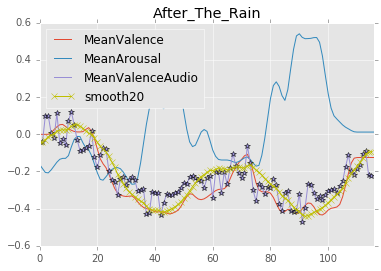

In [123]:
mov =movieNames[0]
aa = getAVprediction(mov)
dfa = getAnnotationDf(mov)
smooth10 = holt_winters_second_order_ewma( df2mat(aa[['MeanValenceAudio']]), 10, 0.3 )
smooth5 = holt_winters_second_order_ewma( df2mat(aa[['MeanValenceAudio']]), 5, 0.3 )
smooth2 = aa[['MeanValenceAudio']].rolling(window=10).mean()
smooth20 = holt_winters_second_order_ewma( df2mat(aa[['MeanValenceAudio']]), 20, 0.3 )

dfa[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
aa[['MeanValenceAudio']].plot(ax=plt.gca(), style=['*-'], title=mov)
#pd.DataFrame(smooth10,columns=['smooth10']).plot(ax=plt.gca(),style=['.-'],title=mov)
#pd.DataFrame(smooth5,columns=['smooth5']).plot(ax=plt.gca(),style=['g+-'],title=mov)
pd.DataFrame(smooth20,columns=['smooth20']).plot(ax=plt.gca(),style=['yx-'],title=mov)
#ax=plt.gca()
#plt.plot(smooth1,label='smoothing')
#plt.plot(smooth2)

In [125]:
smooth10.shape,aa.shape

((116,), (116, 4))

## Generating N-fold csv

In [126]:
visual_feat_list= ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [128]:
%%time
# Visual
pipe_visual_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

pipe_visual_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

# Audio
pipe_audio_valence = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    #PCA(n_components=800),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

# FC16 -->deep fetures
pipe_deep_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

pipe_deep_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

# Low Level Features
pipe_llf_valence = make_pipeline(
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))

pipe_llf_arousal = make_pipeline(
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))


CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.79 ms


In [132]:
%%time
import os
idev_set = {}
smoothing = True

allfold_metric=[]
folddf_dict={}
mean_metric = []

for foldi in [1,2,3,4,5]:
    trainlist, testlist=gettraintest2movielist(foldi,mov2groups)
    os.system("mkdir NfoldCV/fold"+str(foldi))
    testfolder="NfoldCV/fold"+str(foldi)+"/test/"
    trainfolder="NfoldCV/fold"+str(foldi)+"/train/"
    os.system("mkdir "+testfolder)
    os.system("mkdir "+trainfolder)
    
    ii1,mse1,prs1,pvvis = trainPipe(foldi,pipe_visual_valence,'MeanValence','visual')
    ii2,mse2,prs2,pvaud = trainPipe(foldi,pipe_audio_valence,'MeanValence','audio')
    
    ii3,mse3,prs3,pavis = trainPipe(foldi,pipe_visual_arousal,'MeanArousal','visual')
    ii4,mse4,prs4,paaud = trainPipe(foldi,pipe_audio_arousal,'MeanArousal','audio')

    ii5,mse5,prs5,pvdeep = trainPipe(foldi,pipe_deep_valence,'MeanValence','deep')
    ii6,mse6,prs6,padeep = trainPipe(foldi,pipe_deep_arousal,'MeanArousal','deep')

    ii7,mse7,prs7,pvlow = trainPipe(foldi,pipe_llf_valence,'MeanValence','llf')
    ii8,mse8,prs8,palow = trainPipe(foldi,pipe_llf_arousal,'MeanArousal','llf')


    fold_metric=[]
    for f in testlist:
        audiodf = getAudioDf(f)
        visualdf = getAvgVisFeatListDf(f,visual_feat_list)
        deepdf = getAvgVisFeatListDf(f,['fc6'])
        lowdf = getLowFeature10SecDf(f)        
        
        annotdf = getAnnotationDf(f)
        ya = df2mat(annotdf[['MeanArousal']])
        yv = df2mat(annotdf[['MeanValence']])
        
        print(audiodf.shape,visualdf.shape,deepdf.shape,lowdf.shape)

        mlen = min([len(audiodf),len(visualdf),len(deepdf),len(lowdf)])

        audiodf = audiodf[:mlen]
        visualdf = visualdf[:mlen]
        deepdf = deepdf[:mlen]
        lowdf = lowdf[:mlen]
        
        ya = ya[:mlen]
        yv = yv[:mlen]

        aa = paaud.predict(audiodf)     
        va = pvaud.predict(audiodf)
        
        av = pavis.predict(visualdf)
        vv = pvvis.predict(visualdf)
        
        ad = padeep.predict(deepdf)
        vd = pvdeep.predict(deepdf)
        
        al = palow.predict(lowdf)
        vl = pvlow.predict(lowdf)
        

        if smoothing:
            aa = holt_winters_second_order_ewma( aa, 10, 0.3 )
            av = holt_winters_second_order_ewma( av, 10, 0.3 )
            va = holt_winters_second_order_ewma( va, 10, 0.3 )
            vv = holt_winters_second_order_ewma( vv, 10, 0.3 )
            ad = holt_winters_second_order_ewma( ad, 10, 0.3 )
            al = holt_winters_second_order_ewma( al, 10, 0.3 )
            vd = holt_winters_second_order_ewma( vd, 10, 0.3 )
            vl = holt_winters_second_order_ewma( vl, 10, 0.3 )
        
        mseaa, prsaa = getMetrics(ya,aa)
        mseav, prsav = getMetrics(ya,av)
        mseva, prsva = getMetrics(yv,va)
        msevv, prsvv = getMetrics(yv,vv)

        msead, prsad = getMetrics(ya,ad)
        mseal, prsal = getMetrics(ya,al)
        msevd, prsvd = getMetrics(yv,vd)
        msevl, prsvl = getMetrics(yv,vl)

        t = [msevv, prsvv[0], mseva, prsva[0] , mseaa, prsaa[0], mseav, prsav[0],
             msevl, prsvl[0], msevd, prsvd[0] , mseal, prsal[0], msead, prsad[0]]
                
        fold_metric.append(t)
        allfold_metric.append(t)

        arousal_scores = np.transpose([ aa,av,ad,al ])
        arousal_scores = np.mean(arousal_scores,axis=1)
        valence_scores = np.transpose([va,vv,vd,vl ])
        valence_scores = np.mean(valence_scores,axis=1)
        
        meandf = pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])

        #mseA, prsA= getMetrics(ya,arousal_scores)
        #mseV, prsV = getMetrics(yv,valence_scores)
        
        #mean_metric.append([mseV, prsV, mseA, prsA])

        
        df =pd.DataFrame(np.transpose([va, vv, vd, vl, aa, av, ad, al ]), 
                         columns=['MeanValenceAudio','MeanValenceVisual',
                                  'MeanValenceDeep','MeanValenceLow',
                                  'MeanArousalAudio','MeanArousalVisual',
                                  'MeanArousalDeep','MeanArousalLow'])
        idev_set[f] = df
        filename=testfolder+str(foldi)+"_"+f+".csv"
        df.to_csv(filename, index=False)
    
    
    folddf = pd.DataFrame(fold_metric, columns=['MeanValenceVisualMSE','MeanValenceVisualPCC',
                                                'MeanValenceAudioMSE','MeanValenceAudioPCC',
                                                'MeanArousalAudioMSE','MeanArousalAudioPCC',
                                                'MeanArousalVisualMSE','MeanArousalVisualPCC',
                                                'MeanValenceLowLevelMSE','MeanValenceLowLevelPCC',
                                                'MeanValenceDeepMSE','MeanValenceDeepPCC',
                                                'MeanArousalLowLevelMSE','MeanArousalLowLevelPCC',
                                                'MeanArousalDeepMSE','MeanArousalDeepPCC'])
    
    folddf.to_csv(testfolder+str(foldi)+"_metrics.csv") 
    folddf.describe().to_csv(testfolder+str(foldi)+"_metrics_stats.csv") 
    folddf_dict[foldi] = folddf
    
    #########################################ATTENTION ###############################
    ''' 
    for f in trainlist:
        audiodf = getAudioDf(f)
        visualdf = getAvgVisFeatListDf(f,visual_feat_list)
        #print(audiodf.shape,visualdf.shape)

        mlen = min(len(audiodf),len(visualdf))

        audiodf = audiodf[:mlen]
        visualdf = visualdf[:mlen]

        aa = paa.predict(audiodf)
        av = pav.predict(visualdf)
        
        va = pva.predict(audiodf)
        vv = pvv.predict(visualdf)

        if smoothing:
            aa = holt_winters_second_order_ewma( aa, 10, 0.3 )
            av = holt_winters_second_order_ewma( av, 10, 0.3 )
            va = holt_winters_second_order_ewma( va, 10, 0.3 )
            vv = holt_winters_second_order_ewma( vv, 10, 0.3 )

        df =pd.DataFrame(np.transpose([ va, vv ,aa,av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])
        idev_set[f] = df
        filename=trainfolder+str(foldi)+"_"+f+".csv"
        df.to_csv(filename, index=False)
        
    '''
    
allfolddf = pd.DataFrame(allfold_metric, columns=['MeanValenceVisualMSE','MeanValenceVisualPCC',
                                                'MeanValenceAudioMSE','MeanValenceAudioPCC',
                                                'MeanArousalAudioMSE','MeanArousalAudioPCC',
                                                'MeanArousalVisualMSE','MeanArousalVisualPCC',
                                                'MeanValenceLowLevelMSE','MeanValenceLowLevelPCC',
                                                'MeanValenceDeepMSE','MeanValenceDeepPCC',
                                                'MeanArousalLowLevelMSE','MeanArousalLowLevelPCC',
                                                'MeanArousalDeepMSE','MeanArousalDeepPCC'])
    
allfolddf.to_csv("all_metrics.csv") 
allfolddf.describe().to_csv("all_metrics_stats.csv")    
#mean_metricdf=pd.DataFrame(mean_metric,columns=['mseV, prsV, mseA, prsA'])


Train score: 0.95
Test score: -0.61
MSE score: 0.12757
Pearson score:
(-0.012512400010095973, 0.63041949402968256)
Train score: 0.94
Test score: -0.22
MSE score: 0.09649
Pearson score:
(0.19071660961172446, 1.3482767640132043e-13)
Train score: 0.93
Test score: -0.35
MSE score: 0.08113
Pearson score:
(0.14142836196030178, 4.6136082789378667e-08)
Train score: 0.91
Test score: 0.04
MSE score: 0.05775
Pearson score:
(0.37670638887075814, 3.8682936818101966e-51)
Train score: 0.94
Test score: -0.44
MSE score: 0.11420
Pearson score:
(-0.042473260038367558, 0.10228235951712471)
Train score: 0.91
Test score: -0.15
MSE score: 0.06865
Pearson score:
(0.090184750907558536, 0.00051123295475250809)
Train score: 0.91
Test score: -0.60
MSE score: 0.12740
Pearson score:
(0.06478722574275321, 0.012639397730183766)
Train score: 0.90
Test score: -0.48
MSE score: 0.08871
Pearson score:
(-0.033876046103210412, 0.19259151861293355)
((173, 1583), (173, 1271), (173, 4096), (179, 9))
MSE score: 0.03803
Pearson 

## Test-set RUN

In [80]:
%%time

def getAVmeanscore(aa,av,va,vv):
    arousal_scores = np.transpose([ aa,av ])
    arousal_scores = np.mean(arousal_scores,axis=1)
    valence_scores = np.transpose([va,vv ])
    valence_scores = np.mean(valence_scores,axis=1)
    
    df = pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])
    
    return df


def getAVTestprediction(f):
    
    audiodf = getAudioDf(f,folder=med2017audiofolderTest)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list,
                                   folder=med2017visualfolderTest)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = paa.predict(audiodf)
    av = pav.predict(visualdf)
        
    va = pvv.predict(audiodf)
    vv = pva.predict(visualdf)

    df = pd.DataFrame(np.transpose([vv, va , aa, av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])
     
    meandf = getAVmeanscore(aa,av,va,vv)
    
    return df

os.system("mkdir ./Test-Prediction")
itest_set = {}

ii1,mse1,prs1,pvv = trainPipe(4,pipe_visual_valence,'MeanValence','visual')
ii2,mse2,prs2,pva = trainPipe(3,pipe_audio_valence,'MeanValence','audio')
   
ii3,mse3,prs3,pav = trainPipe(1,pipe_visual_arousal,'MeanArousal','visual')
ii4,mse4,prs4,paa = trainPipe(1,pipe_audio_arousal,'MeanArousal','audio')

fname = 'me17ei_BOUNNKU_valence_arousal_smooth_2.txt'
fd = open(fname, 'w')
fd.close()

for f in testmovieNames:
    print(f)
    
    fd = open(fname, 'a')
    fd.write(f+'\n')  # python will convert \n to os.linesep
    fd.close()

    audiodf = getAudioDf(f,folder=med2017audiofolderTest)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list,
                                   folder=med2017visualfolderTest)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = paa.predict(audiodf)
    av = pav.predict(visualdf)
        
    va = pva.predict(audiodf)
    vv = pvv.predict(visualdf)

    if smoothing:
        aa = holt_winters_second_order_ewma( aa, 10, 0.3 )
        av = holt_winters_second_order_ewma( av, 10, 0.3 )
        va = holt_winters_second_order_ewma( va, 10, 0.3 )
        vv = holt_winters_second_order_ewma( vv, 10, 0.3 )

    df = pd.DataFrame(np.transpose([vv, va , aa, av ]), columns=['MeanValenceAudio','MeanValenceVisual','MeanArousalAudio','MeanArousalVisual'])
     
    meandf = getAVmeanscore(aa,av,va,vv)
    itest_set[f]=meandf  
    #scoresdf , meanddf = getAVTestprediction(f) 
    sfilename="./Test-Prediction/"+f+".csv"
    df.to_csv(sfilename, index=False)
    
    meandf.to_csv(fname, sep=' ', index=False, header=False, mode='a')
    

(3818, 1271) (3818, 1583) (3818, 4096) (3818, 2)
(1446, 1271) (1446, 1583) (1446, 4096) (1446, 2)
Train score: 0.95
Test score: -0.73
MSE score: 0.15579
Pearson score:
(0.39415670149140347, 6.0520934336701606e-55)
(3827, 1271) (3827, 1583) (3827, 4096) (3827, 2)
(1437, 1271) (1437, 1583) (1437, 4096) (1437, 2)
Train score: 0.94
Test score: -0.03
MSE score: 0.09450
Pearson score:
(0.25340858644380443, 1.7133760887453711e-22)
(3783, 1271) (3783, 1583) (3783, 4096) (3783, 2)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 2)
Train score: 0.93
Test score: -0.35
MSE score: 0.08112
Pearson score:
(0.14151114465619502, 4.530283935226392e-08)
(3783, 1271) (3783, 1583) (3783, 4096) (3783, 2)
(1481, 1271) (1481, 1583) (1481, 4096) (1481, 2)
Train score: 0.91
Test score: 0.04
MSE score: 0.05775
Pearson score:
(0.37670638887075969, 3.8682936818061836e-51)
MEDIAEVAL17_00
(702, 1583) (702, 1271)
MEDIAEVAL17_01
(167, 1583) (168, 1271)
MEDIAEVAL17_02
(943, 1583) (943, 1271)
MEDIAEVAL17_03
(1091, 1583) (

In [66]:

#test
f = "Wanted"
audiodf = getAudioDf(f)
visualdf = getAvgVisFeatListDf(f,visual_feat_list)
print(audiodf.shape,visualdf.shape)

mlen = min(len(audiodf),len(visualdf))

audiodf = audiodf[:mlen]
visualdf = visualdf[:mlen]

aa = paa.predict(audiodf)
av = pav.predict(visualdf)
arousal_scores = np.transpose([ aa,av ])
        

va = pvv.predict(audiodf)  ## look up this is twisted
vv = pva.predict(visualdf)
valence_scores = np.transpose([va,vv ])
        
df =pd.DataFrame(np.transpose([ aa,av , va,vv ])) #, columns=['MeanValence','MeanArousal'])


(22, 1583) (22, 1271)


In [166]:
#pd.DataFrame(results,columns=['test-group','MSE','PCC'])
pipe1scores = crossgroups(pipe_visual_valence,'MeanValence','visual')
pipe1scores

(4352, 1271) (4352, 1583) (4352, 4096) (4352, 2)
(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(4526, 1271) (4526, 1583) (4526, 4096) (4526, 2)
(4529, 1271) (4529, 1583) (4529, 4096) (4529, 2)
(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(4521, 1271) (4521, 1583) (4521, 4096) (4521, 2)
(4562, 1271) (4562, 1583) (4562, 4096) (4562, 2)
(738, 1271) (738, 1583) (738, 4096) (738, 2)
(912, 1271) (912, 1583) (912, 4096) (912, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)
(735, 1271) (735, 1583) (735, 4096) (735, 2)
(743, 1271) (743, 1583) (743, 4096) (743, 2)
(702, 1271) (702, 1583) (702, 4096) (702, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)
Train score: 0.94
Train score: 0.95
Train score: 0.95
Train score: 0.95
Train score: 0.95
Train score: 0.95
Train score: 0.95
Test score: -0.46
Test score: -1.70
Test score: -0.27
Test score: -0.46
Test score: -0.79
Test score: -0.58
Test score: -0.46
MSE score: 0.14852
Pearson score:
(0.0062357629957094643, 0.86679496607230866)
MSE score: 

test-group       MSE       PCC
0           0  0.135345 -0.088656
1           1  0.103613  0.296140
2           2  0.192597  0.364418
3           3  0.148517  0.006236
4           4  0.167325 -0.121752
5           5  0.078887  0.134925
6           6  0.207572  0.355358

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Xa_train.shape, Xa_test.shape, ya_train.shape, ya_test.shape)
print(tXv.shape,tXa.shape,ty.shape)
print(testXv.shape, testXa.shape, testy.shape)

(3644, 1271) (912, 1271) (3644, 2) (912, 2)
(3644, 1583) (912, 1583) (3644, 2) (912, 2)
(4556, 1271) (4556, 1583) (4556, 2)
(708, 1271) (708, 1583) (708, 2)


In [43]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#X_train.shape, X_test.shape, y_train.shape, y_test.shape 
#tXv.shape,tXa.shape,ty.shape
#testXv.shape, testXa.shape, testy.shape

pipe_visual_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

#SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
#  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
#  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#X_train, X_test, y_train, y_test 
y_pred_visV_train,mse,prs,pipe_vv = evaluate_pipe(pipe_visual_valence, 
                                   X_train,y_train[['MeanValence']], 
                                   X_test,  y_test[['MeanValence']])
#y_pred_vis,mse,prs = evaluate_pipe(pipe_visual_valence,tXv,ytrain,testXv,ytest)

y_pred_visV_test,mse,prs,pipe_vv = evaluate_pipe(pipe_visual_valence, 
                                   tXv,ty[['MeanValence']], 
                                   testXv, testy[['MeanValence']])



Train score: 0.94
Test score: 0.81
MSE score: 0.02165
Pearson score:
(0.90344469546466666, 0.0)
Train score: 0.95
Test score: -0.79
MSE score: 0.19260
Pearson score:
(0.36441773046669984, 1.1692814368608515e-23)
CPU times: user 1min 9s, sys: 4 ms, total: 1min 9s
Wall time: 1min 9s


In [ ]:
#pipe_visual_valence_scores

In [ ]:
#sorted(pipe_visual_valence_scores.MSE),sorted(pipe_visual_valence_scores.PCC)

## Grid-Search on Audio features - Valence

In [48]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 

#pipe = Pipeline([('preprocessing', StandardScaler()),('reduce_dim', PCA(n_components=600)) ,('classifier', SVR())])
pipe = Pipeline([('preprocessing', StandardScaler()),('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 
     'preprocessing': [StandardScaler()],
     #'reduce_dim__n_components' : [ 50, 100, 500 ,750],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400],
     'classifier__max_features': [3,5,10]}
]

grid_audio_valence = GridSearchCV(pipe, param_grid, cv=5,n_jobs=-1)
ytrainarray = ya_train[['MeanValence']].as_matrix()
ytrainarray = ytrainarray.reshape((len(ya_train),))
grid_audio_valence.fit(Xa_train,ytrainarray)

print("Best params:\n{}\n".format(grid_audio_valence.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audio_valence.best_score_))
print("All grid scores")

grid_audio_valence.grid_scores_, grid_audio_valence.best_params_, grid_audio_valence.best_score_

Best params:
{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.53
All grid scores
CPU times: user 1min 44s, sys: 11.5 s, total: 1min 55s
Wall time: 2min 45s


In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Xa_train.shape, Xa_test.shape, ya_train.shape, ya_test.shape)
print(tXv.shape,tXa.shape,ty.shape)
print(testXv.shape, testXa.shape, testy.shape)

(2477, 1271) (1167, 1271) (2477, 2) (1167, 2)
(2915, 1583) (729, 1583) (2915, 2) (729, 2)
(3644, 1271) (3644, 1583) (3644, 2)
(708, 1271) (708, 1583) (708, 2)


In [49]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_audio_valence = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)

#    SVR(C=10, cache_size=200, coef0=0.0, degree=3, 
#       epsilon=0.1, gamma=0.001,
#      kernel='rbf', max_iter=-1, 
#     shrinking=True, tol=0.001, verbose=False)


#Xa_train, Xa_test, ya_train, ya_test 
y_pred_audV_train,mse,prs,pipe_va = evaluate_pipe(pipe_audio_valence, 
                                   Xa_train,ya_train[['MeanValence']], 
                                   Xa_test,ya_test[['MeanValence']])

y_pred_audV_test,mse,prs,pipe_va = evaluate_pipe(pipe_audio_valence, 
                                   tXa,ty[['MeanValence']], 
                                   testXa,testy[['MeanValence']])



Train score: 0.93
Test score: 0.56
MSE score: 0.05061
Pearson score:
(0.76498279389571466, 4.5245244239857375e-176)
Train score: 0.93
Test score: -0.19
MSE score: 0.12872
Pearson score:
(0.22000713384401305, 3.2925748548172267e-09)
CPU times: user 2min 9s, sys: 24 ms, total: 2min 9s
Wall time: 2min 9s


In [68]:
pipe2scores = crossgroups(pipe_audio_valence,'MeanValence','audio')

(4352, 1271) (4352, 1583) (4352, 4096) (4352, 2)
(4526, 1271) (4526, 1583) (4526, 4096) (4526, 2)
(4529, 1271) (4529, 1583) (4529, 4096) (4529, 2)
(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(4521, 1271) (4521, 1583) (4521, 4096) (4521, 2)
(4562, 1271) (4562, 1583) (4562, 4096) (4562, 2)
(912, 1271) (912, 1583) (912, 4096) (912, 2)
(702, 1271) (702, 1583) (702, 4096) (702, 2)
(738, 1271) (738, 1583) (738, 4096) (738, 2)
(735, 1271) (735, 1583) (735, 4096) (735, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)
(743, 1271) (743, 1583) (743, 4096) (743, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)
Train score: 0.92
Train score: 0.94
Train score: 0.94
Train score: 0.93
Train score: 0.94
Test score: -1.85
Train score: 0.93
Train score: 0.94
Test score: -0.52
Test score: -0.19
Test score: -0.19
Test score: 0.08
Test score: 0.06
Test score: -0.09
MSE score: 0.21949
Pearson score:
(0.22803118653596122, 3.1928865845418501e-12)
MSE score: 0

In [69]:
pipe2scores


test-group       MSE       PCC
0           0  0.078894  0.323093
1           1  0.107623  0.066597
2           2  0.128717  0.220007
3           3  0.121412  0.045289
4           4  0.124347  0.356526
5           5  0.059194  0.241319
6           6  0.219488  0.228031

In [70]:
pipe1scores

test-group       MSE       PCC
0           0  0.135345 -0.088656
1           1  0.103613  0.296140
2           2  0.192597  0.364418
3           3  0.148517  0.006236
4           4  0.167325 -0.121752
5           5  0.078887  0.134925
6           6  0.207572  0.355358

In [149]:
y_pred_visV_train.shape,y_test.shape, y_pred_visV_test.shape,testy.shape

((1453,), (1453, 2), (726,), (726, 2))

In [151]:
y_pred_audV_train.shape,ya_test.shape, y_pred_audV_test.shape,testy.shape

((908,), (908, 2), (726,), (726, 2))

In [ ]:
y_val_vitrain = pipe_visual_valence.fit(tXv,df2mat(ty[['MeanValence']])).predict(tXv)
y_val_autrain = pipe_audio_valence.fit(tXa,df2mat(ty[['MeanValence']])).predict(tXa)

train_val = np.transpose([y_val_vitrain,y_val_autrain])
train_val_y = df2mat(ty[['MeanValence']])

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()],
     'classifier__kernel':['linear','rbf'],
     'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [ 1, 10, 100]}
]

grid_valence_fuse = GridSearchCV(pipe, param_grid, cv=5,n_jobs=100)
grid_valence_fuse.fit(train_val,train_val_y)

print("Best params:\n{}\n".format(grid_valence_fuse.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_valence_fuse.best_score_))
print("All grid scores")


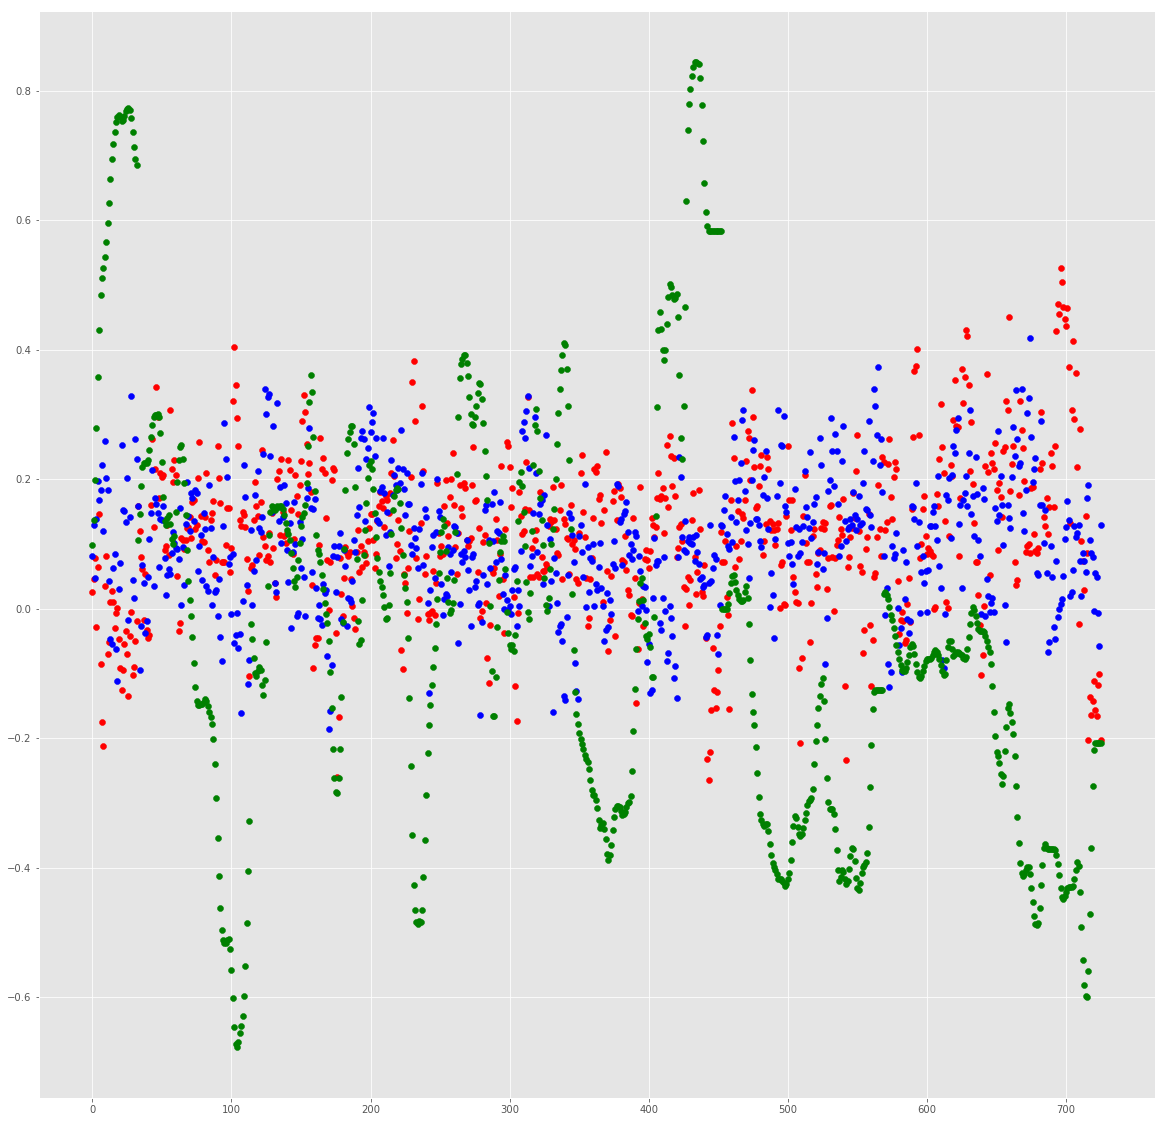

In [142]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_vis,c='r')
plt.scatter(range(len(testy)),y_pred_aud,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanValence']]),c='g')


## Grid Search on Visual Features -Arousal

In [ ]:
%%time
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400, 600, 1000],
     'classifier__max_features': [3,5,10,15,20]}
]

grid_vis_arousal = GridSearchCV(pipe, param_grid, cv=5,n_jobs=120)
ytrainarray = y_train[['MeanArousal']].as_matrix()
ytrainarray = ytrainarray.reshape((len(y_train),))
grid_vis_arousal.fit(X_train,ytrainarray)



In [72]:
print("Best params:\n{}\n".format(grid_vis_arousal.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_vis_arousal.best_score_))
grid_vis_arousal.grid_scores_, grid_vis_arousal.best_params_, grid_vis_arousal.best_score_

Best params:
{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.74


([mean: 0.06156, std: 0.00958, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00101, std: 0.00637, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00935, std: 0.00589, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.009

In [73]:
grid_vis_arousal.best_params_

{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'classifier__C': 100,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [74]:
grid_vis_arousal.best_score_

0.7385727011014819

In [75]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#X_train.shape, X_test.shape, y_train.shape, y_test.shape 
#tXv.shape,tXa.shape,ty.shape
#testXv.shape, testXa.shape, testy.shape

pipe_visual_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

#X_train, X_test, y_train, y_test 
y_pred_visA_train,mse,prs,pipe_av = evaluate_pipe(pipe_visual_arousal, 
                                   X_train,y_train[['MeanArousal']], 
                                   X_test,  y_test[['MeanArousal']])

y_pred_visA_test,mse,prs,pipe_av = evaluate_pipe(pipe_visual_arousal, 
                                   tXv,ty[['MeanArousal']], 
                                   testXv, testy[['MeanArousal']])


Train score: 0.92
Test score: 0.78
MSE score: 0.01907
Pearson score:
(0.88831506127409721, 8.414561858120353e-310)
Train score: 0.92
Test score: -0.28
MSE score: 0.11210
Pearson score:
(0.11492042888053544, 0.0021943582863590029)
CPU times: user 1min 8s, sys: 48 ms, total: 1min 8s
Wall time: 1min 8s


In [148]:
y_pred_visA_train.shape,y_test.shape, y_pred_visA_test.shape,testy.shape

((1453,), (1453, 2), (726,), (726, 2))

In [76]:
pipe3scores = crossgroups(pipe_visual_arousal,'MeanArousal','visual')

(4352, 1271) (4352, 1583) (4352, 4096) (4352, 2)
(4526, 1271) (4526, 1583) (4526, 4096) (4526, 2)
(4529, 1271) (4529, 1583) (4529, 4096) (4529, 2)
(4521, 1271) (4521, 1583) (4521, 4096) (4521, 2)
(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(4562, 1271) (4562, 1583) (4562, 4096) (4562, 2)
(743, 1271) (743, 1583) (743, 4096) (743, 2)
(702, 1271) (702, 1583) (702, 4096) (702, 2)
(912, 1271) (912, 1583) (912, 4096) (912, 2)
(738, 1271) (738, 1583) (738, 4096) (738, 2)
(735, 1271) (735, 1583) (735, 4096) (735, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)
Train score: 0.91
Train score: 0.93
Train score: 0.93
Test score: 0.10
Train score: 0.93
Train score: 0.93
Train score: 0.92
Train score: 0.93
Test score: -0.53
Test score: -0.23
MSE score: 0.11514
Pearson score:
(0.37904846653261204, 1.551505325235092e-32)
Test score: -0.20
Test score: -0.12
Test score: -0.28
MSE score: 0.08356
Pearson sco

In [77]:
pipe3scores

test-group       MSE       PCC
0           0  0.053787  0.224167
1           1  0.087400  0.275252
2           2  0.112104  0.114920
3           3  0.083560  0.001598
4           4  0.079956  0.073692
5           5  0.058802  0.189082
6           6  0.115136  0.379048

## Grid Search on Audio Features -Arousal

In [78]:
%%time
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400, 600, 1000],
     'classifier__max_features': [3,5,10,15,20]}
]

grid_audio_arousal = GridSearchCV(pipe, param_grid, cv=5,n_jobs=220)
ytrainarray = ya_train[['MeanArousal']].as_matrix()
ytrainarray = ytrainarray.reshape((len(ya_train),))
grid_audio_arousal.fit(Xa_train,ytrainarray)



CPU times: user 2min 37s, sys: 26.6 s, total: 3min 3s
Wall time: 4min 2s


In [79]:
print("Best params:\n{}\n".format(grid_audio_arousal.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audio_arousal.best_score_))
grid_audio_arousal.grid_scores_, grid_audio_arousal.best_params_, grid_audio_arousal.best_score_

Best params:
{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.46


([mean: 0.01696, std: 0.00651, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00948, std: 0.00590, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00949, std: 0.00590, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.009

In [80]:
grid_audio_arousal.best_score_

0.45895912404912326

In [148]:
X_train.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270],
           dtype='int64', length=1271)

In [81]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),  
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)
y_pred_audA_train,mse,prs,pipe_aa = evaluate_pipe(pipe_audio_arousal, 
                                   Xa_train,ya_train[['MeanArousal']], 
                                   Xa_test,ya_test[['MeanArousal']])

y_pred_audA_test,mse,prs,pipe_aa = evaluate_pipe(pipe_audio_arousal, 
                                   tXa,ty[['MeanArousal']], 
                                   testXa,testy[['MeanArousal']])



Train score: 0.90
Test score: 0.46
MSE score: 0.04632
Pearson score:
(0.69802308700538951, 3.8932885202799436e-134)
Train score: 0.90
Test score: -0.24
MSE score: 0.10834
Pearson score:
(-0.0047055387115798692, 0.90053487320266001)
CPU times: user 2min 5s, sys: 44 ms, total: 2min 5s
Wall time: 2min 5s


In [93]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    #PCA(n_components=800),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)
y_pred_audA_train,mse,prs,pipe_aa2 = evaluate_pipe(pipe_audio_arousal, 
                                   Xa_train,ya_train[['MeanArousal']], 
                                   Xa_test,ya_test[['MeanArousal']])

y_pred_audA_test,mse,prs,pipe_aa2 = evaluate_pipe(pipe_audio_arousal, 
                                   tXa,ty[['MeanArousal']], 
                                   testXa,testy[['MeanArousal']])



Train score: 0.53
Test score: 0.29
MSE score: 0.05177
Pearson score:
(0.55740224174159003, 2.9797826919266122e-72)
Train score: 0.58
Test score: -0.17
MSE score: 0.15030
Pearson score:
(0.029656273283452401, 0.37101791611056034)
CPU times: user 23min 18s, sys: 11.9 s, total: 23min 30s
Wall time: 1min 13s


In [82]:
pipe4scores = crossgroups(pipe_audio_arousal,'MeanArousal','audio')

(4352, 1271) (4352, 1583) (4352, 4096) (4352, 2)
(4526, 1271) (4526, 1583) (4526, 4096) (4526, 2)
(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(4556, 1271) (4556, 1583) (4556, 4096) (4556, 2)
(4521, 1271) (4521, 1583) (4521, 4096) (4521, 2)
(4529, 1271) (4529, 1583) (4529, 4096) (4529, 2)
(4562, 1271) (4562, 1583) (4562, 4096) (4562, 2)
(738, 1271) (738, 1583) (738, 4096) (738, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)
(743, 1271) (743, 1583) (743, 4096) (743, 2)
(912, 1271) (912, 1583) (912, 4096) (912, 2)
(702, 1271) (702, 1583) (702, 4096) (702, 2)
(735, 1271) (735, 1583) (735, 4096) (735, 2)
(708, 1271) (708, 1583) (708, 4096) (708, 2)
Train score: 0.89
Train score: 0.91
Train score: 0.91
Test score: -0.11
Train score: 0.90
Train score: 0.91
Train score: 0.91
Train score: 0.91
Test score: 0.10
Test score: -0.11
Test score: -0.24
Test score: -0.35
Test score: -0.24
MSE score: 0.14148
Pearson score:
(0.11365776381857078, 0.0005842325174730469)
Test score: 0.02
MSE score: 0.

In [141]:
pipe4scores

test-group       MSE       PCC
0           0  0.053187  0.190283
1           1  0.063860  0.479557
2           2  0.108337 -0.004706
3           3  0.073607  0.067498
4           4  0.071342  0.248574
5           5  0.060822  0.038884
6           6  0.141478  0.113658

In [83]:
y_pred_visA_train.shape,y_test.shape, y_pred_visA_test.shape,testy.shape

((912,), (912, 2), (708,), (708, 2))

In [84]:
y_pred_audA_train.shape,ya_test.shape, y_pred_audA_test.shape,testy.shape

((912,), (912, 2), (708,), (708, 2))

In [93]:
y_pred_meanV = np.mean(np.transpose([y_pred_visV_test,y_pred_audV_test]),axis=1)

In [154]:
pipe11=pipe_visual_valence
pipe22=pipe_audio_valence
pipe33=pipe_visual_arousal
pipe44=pipe_audio_arousal

In [ ]:
allXv,allXa,allXd,ally = getFeatureswAnnotationsDf(movieNames)



In [155]:
print(allXv.shape,allXa.shape,allXd.shape,ally.shape)

(5264, 1271) (5264, 1583) (5264, 4096) (5264, 2)


In [82]:
allXv_train, allXv_test, ally_train, ally_test = train_test_split(allXv, ally,test_size=0.2, random_state=0)
allXa_train, allXa_test, allya_train, allya_test = train_test_split(allXa, ally,test_size=0.2, random_state=0)
allXd_train, allXd_test, allyd_train, allyd_test = train_test_split(allXd, ally,test_size=0.2, random_state=0)


NameError: name 'allXv' is not defined

In [167]:
%%time
y_pred_aa_test,mse,prs,pipe4aa = evaluate_pipe(pipe_audio_arousal, 
                                   allXa_train,allya_train[['MeanArousal']], 
                                   testXa,testy[['MeanArousal']])



Train score: 0.91
Test score: 0.82
MSE score: 0.01587
Pearson score:
(0.92753393643222781, 5.536189849578476e-304)
CPU times: user 1min 6s, sys: 0 ns, total: 1min 6s
Wall time: 1min 6s


In [168]:
%%time
y_pred_av_test,mse,prs,pipe3av = evaluate_pipe(pipe_visual_arousal, 
                                   allXv_train,ally_train[['MeanArousal']], 
                                   testXv,testy[['MeanArousal']])



Train score: 0.92
Test score: 0.89
MSE score: 0.00994
Pearson score:
(0.95159716522684401, 0.0)
CPU times: user 37.8 s, sys: 0 ns, total: 37.8 s
Wall time: 37.8 s


In [169]:
y_pred_va_test,mse,prs,pipe2va = evaluate_pipe(pipe_audio_valence, 
                                   allXa_train,allya_train[['MeanValence']], 
                                   testXa,testy[['MeanValence']])
y_pred_vv_test,mse,prs,pipe1vv = evaluate_pipe(pipe_visual_valence, 
                                   allXv_train,ally_train[['MeanValence']], 
                                   testXv,testy[['MeanValence']])


Train score: 0.93
Test score: 0.82
MSE score: 0.01979
Pearson score:
(0.92341254627481562, 7.8903979285267218e-296)
Train score: 0.95
Test score: 0.91
MSE score: 0.01010
Pearson score:
(0.95710678124440263, 0.0)


In [170]:
pipe4scores.sort_values('PCC')

test-group       MSE       PCC
2           2  0.108337 -0.004706
5           5  0.060822  0.038884
3           3  0.073607  0.067498
6           6  0.141478  0.113658
0           0  0.053187  0.190283
4           4  0.071342  0.248574
1           1  0.063860  0.479557

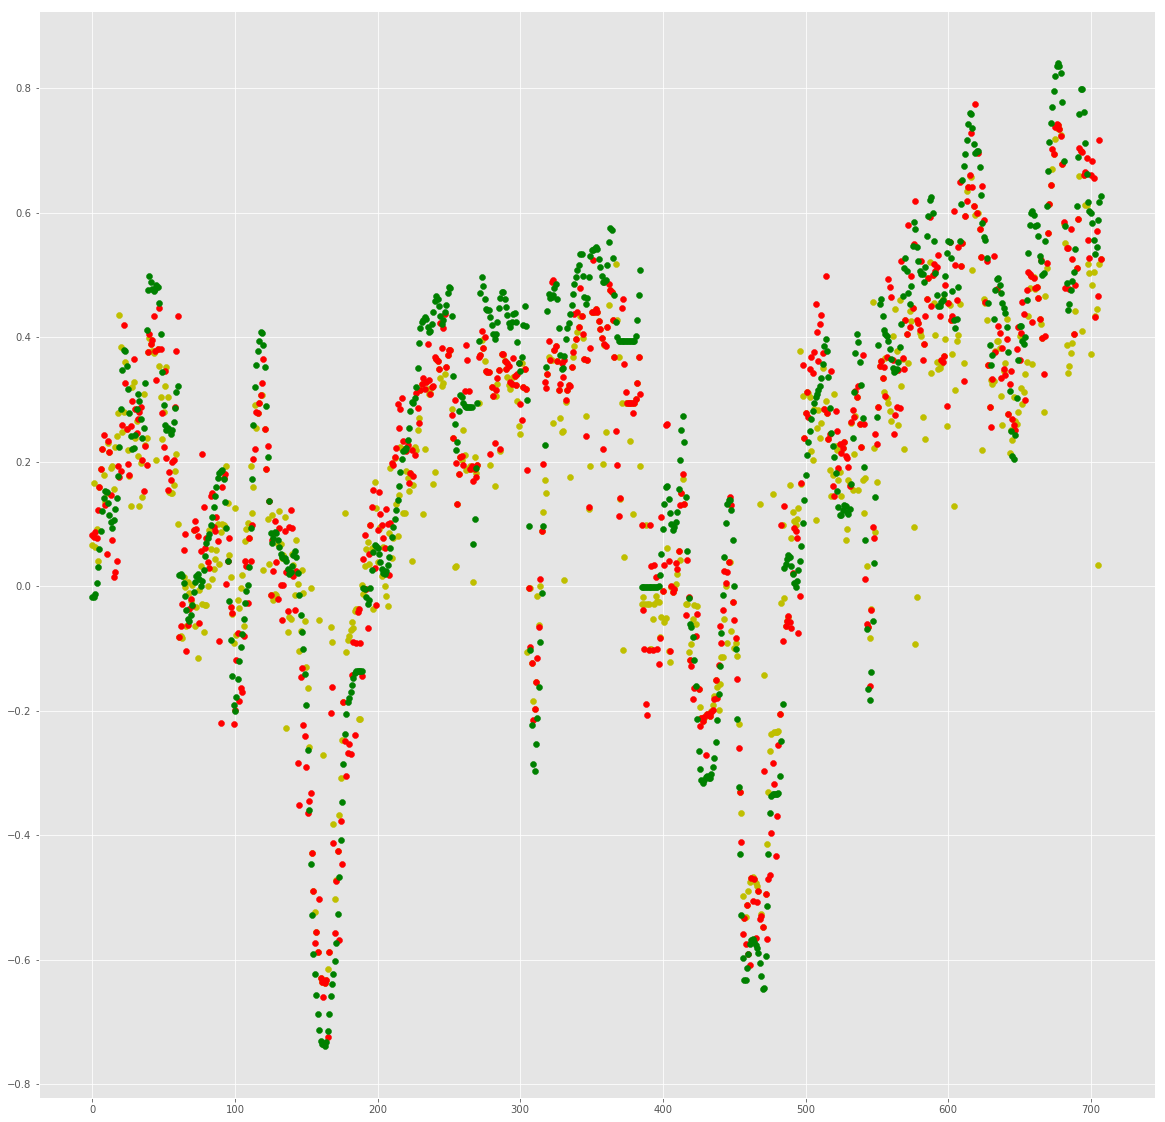

In [171]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_va_test,c='y')
plt.scatter(range(len(testy)),y_pred_vv_test,c='r')
plt.scatter(range(len(testy)),df2mat(testy[['MeanValence']]),c='g')


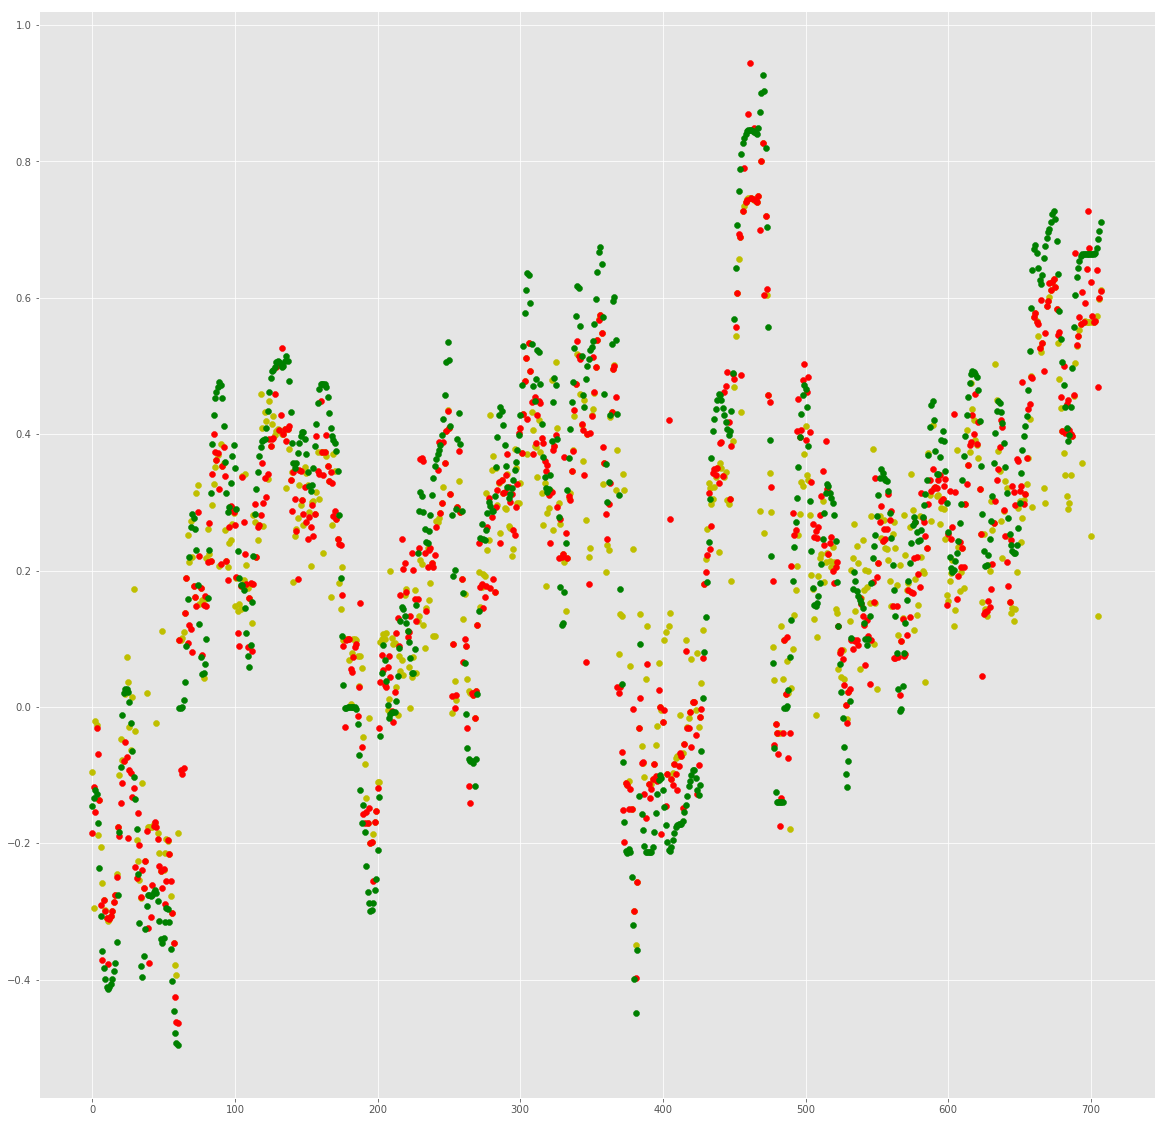

In [172]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_aa_test,c='y')
plt.scatter(range(len(testy)),y_pred_av_test,c='r')
plt.scatter(range(len(testy)),df2mat(testy[['MeanArousal']]),c='g')


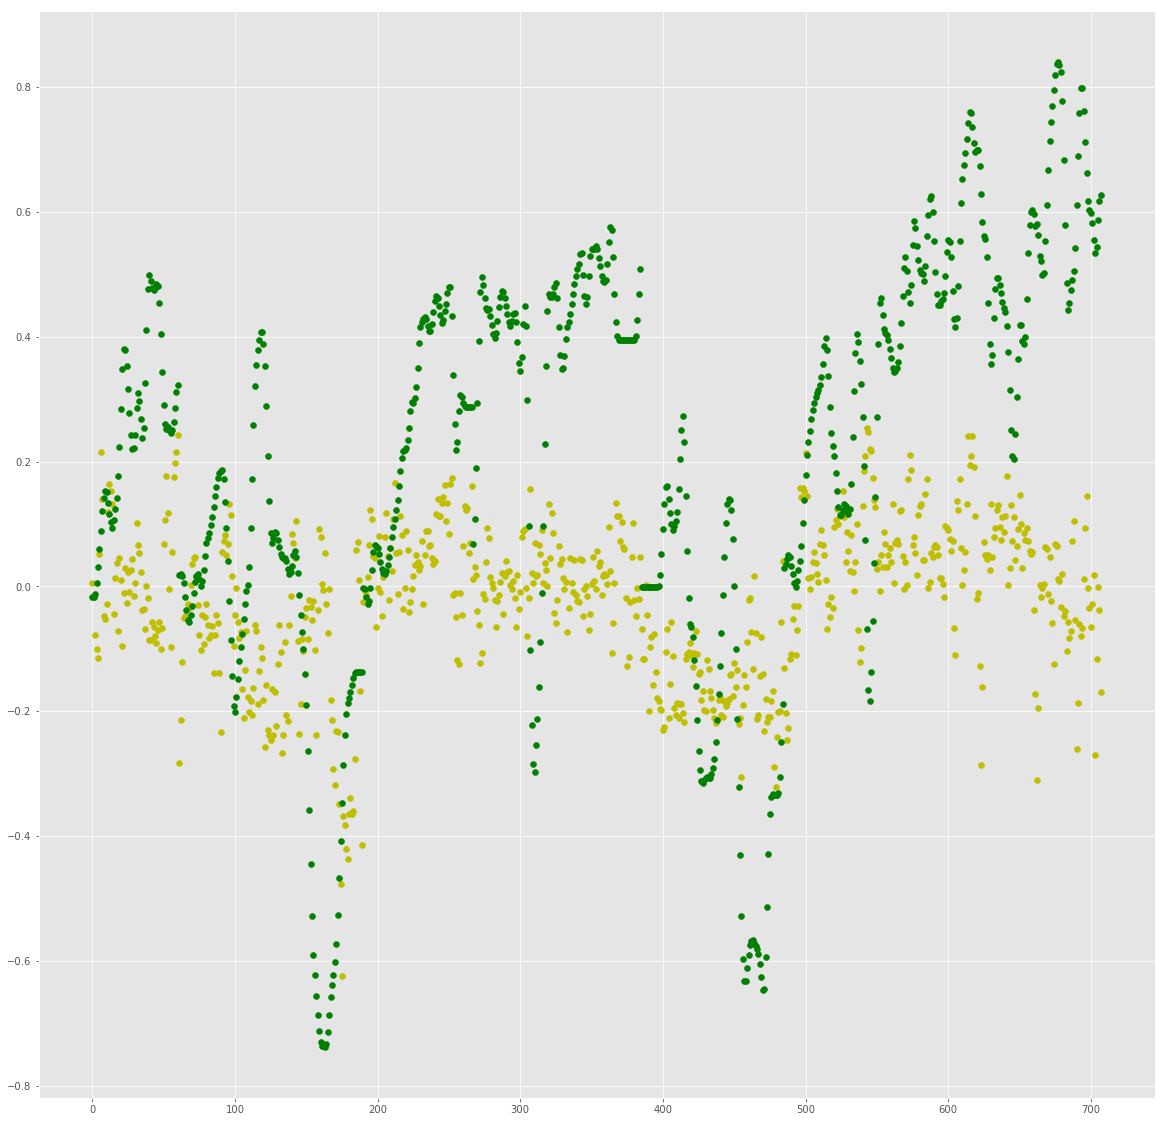

In [94]:
plt.figure(figsize=(20,20))
#plt.scatter(range(len(testy)),y_pred_meanV,c='y')
#plt.scatter(range(len(testy)),y_pred_visV_test,c='r')
#plt.scatter(range(len(testy)),y_pred_audV_test,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanValence']]),c='g')


In [95]:
y_pred_meanA = np.mean(np.transpose([y_pred_visA_test,y_pred_audA_test]),axis=1)

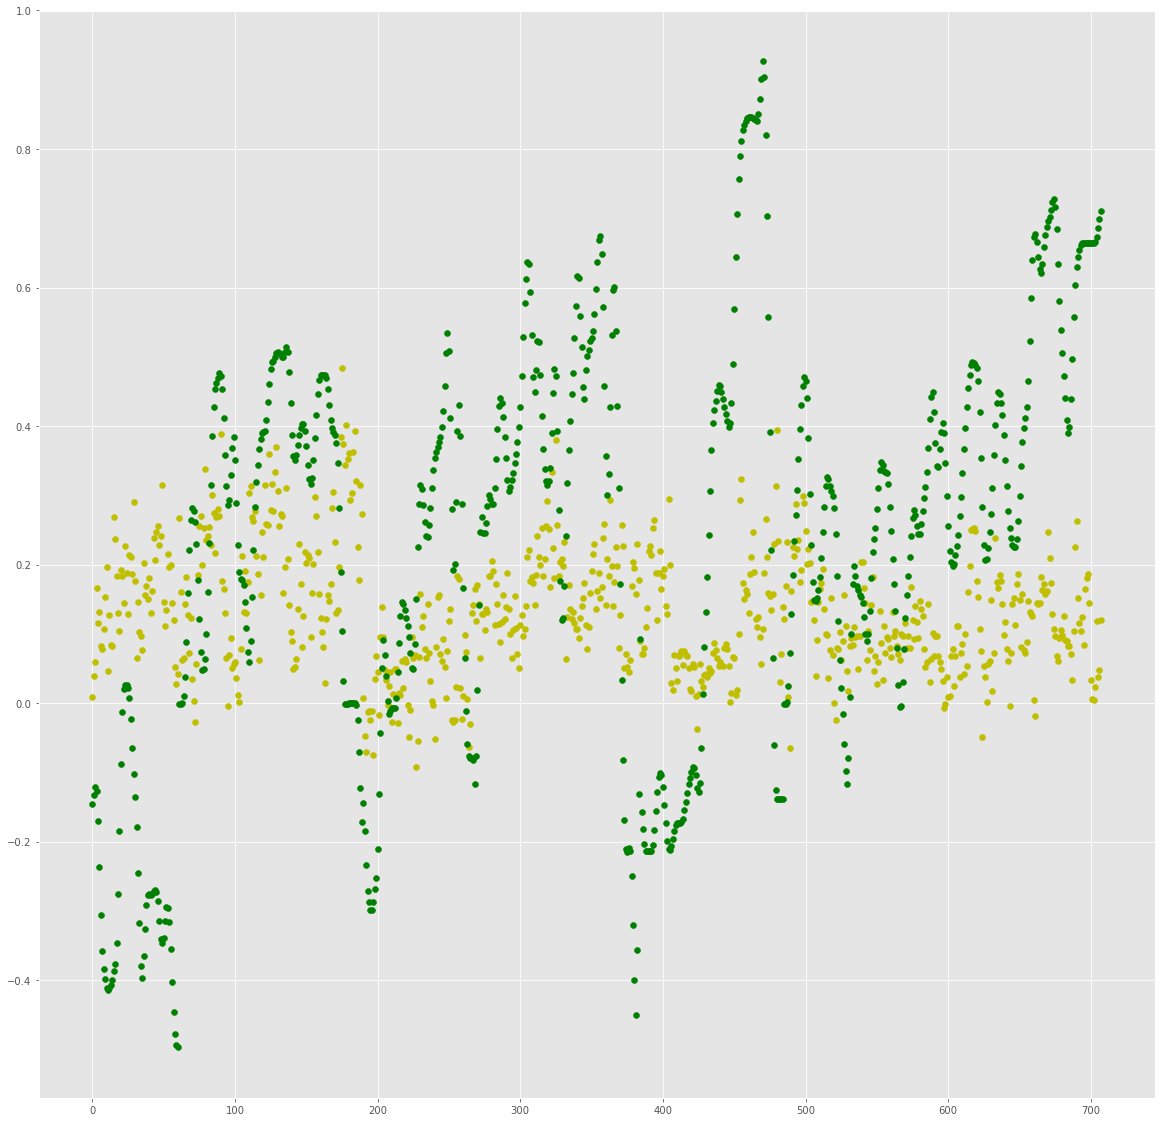

In [96]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_meanA,c='y')
#plt.scatter(range(len(testy)),y_pred_visA_test,c='r')
#plt.scatter(range(len(testy)),y_pred_audA_test,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanArousal']]),c='g')


# Test Run 1

In [190]:
print(pipe_audio_arousal, 
pipe_visual_arousal, 
pipe_audio_valence, 
pipe_visual_valence)


Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]) Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]) Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]) Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])


In [101]:
visual_feat_list= ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [187]:
%%time
#pipe4aa
#pipe3av
#pipe2va
#pipe1vv
fname = 'me17ei_BOUNNKU_valence_arousal_1_run2.txt'
fd = open(fname, 'w')
fd.close()

test_set = {}
for f in testmovieNames:
    print(f)
    
    fd = open(fname, 'a')
    fd.write(f+'\n')  # python will convert \n to os.linesep
    fd.close()
    
    audiodf = getAudioDf(f,folder=med2017audiofolderTest)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list,
                                   folder=med2017visualfolderTest)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = pipe4aa.predict(audiodf)
    av = pipe3av.predict(visualdf)
    arousal_scores = np.transpose([ aa,av ])
    arousal_scores = np.mean(arousal_scores,axis=1)
    
    va = pipe2va.predict(audiodf)
    vv = pipe1vv.predict(visualdf)
    valence_scores = np.transpose([va,vv ])
    valence_scores = np.mean(valence_scores,axis=1)
    
    df =pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])
    df.to_csv(fname, sep=' ', index=False, header=False, mode='a')
    test_set[f] = df
    

MEDIAEVAL17_00
(702, 1583) (702, 1271)
MEDIAEVAL17_01
(167, 1583) (168, 1271)
MEDIAEVAL17_02
(943, 1583) (943, 1271)
MEDIAEVAL17_03
(1091, 1583) (1091, 1271)
MEDIAEVAL17_04
(151, 1583) (151, 1271)
MEDIAEVAL17_05
(1251, 1583) (1251, 1271)
MEDIAEVAL17_06
(1117, 1583) (1117, 1271)
MEDIAEVAL17_07
(41, 1583) (41, 1271)
MEDIAEVAL17_08
(40, 1583) (41, 1271)
MEDIAEVAL17_09
(41, 1583) (41, 1271)
MEDIAEVAL17_10
(41, 1583) (41, 1271)
MEDIAEVAL17_11
(41, 1583) (41, 1271)
MEDIAEVAL17_12
(41, 1583) (41, 1271)
MEDIAEVAL17_13
(41, 1583) (41, 1271)
CPU times: user 2min 50s, sys: 2.54 s, total: 2min 53s
Wall time: 2min 53s


In [184]:
# ploting results on dev-
dev_set = {}
for f in movieNames:
    audiodf = getAudioDf(f)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = pipe4aa.predict(audiodf)
    av = pipe3av.predict(visualdf)
    arousal_scores = np.transpose([ aa,av ])
    arousal_scores = np.mean(arousal_scores,axis=1)
    
    va = pipe2va.predict(audiodf)
    vv = pipe1vv.predict(visualdf)
    valence_scores = np.transpose([va,vv ])
    valence_scores = np.mean(valence_scores,axis=1)
    
    df =pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])
    dev_set[f] = df


(116, 1583) (117, 1271)
(273, 1583) (273, 1271)
(196, 1583) (196, 1271)
(176, 1583) (176, 1271)
(118, 1583) (118, 1271)
(100, 1583) (101, 1271)
(139, 1583) (139, 1271)
(201, 1583) (202, 1271)
(912, 1583) (912, 1271)
(129, 1583) (129, 1271)
(127, 1583) (127, 1271)
(223, 1583) (223, 1271)
(33, 1583) (33, 1271)
(154, 1583) (154, 1271)
(77, 1583) (77, 1271)
(339, 1583) (339, 1271)
(61, 1583) (61, 1271)
(99, 1583) (99, 1271)
(157, 1583) (157, 1271)
(214, 1583) (214, 1271)
(179, 1583) (179, 1271)
(176, 1583) (176, 1271)
(184, 1583) (185, 1271)
(227, 1583) (227, 1271)
(145, 1583) (146, 1271)
(48, 1583) (49, 1271)
(185, 1583) (185, 1271)
(81, 1583) (82, 1271)
(22, 1583) (22, 1271)
(173, 1583) (173, 1271)


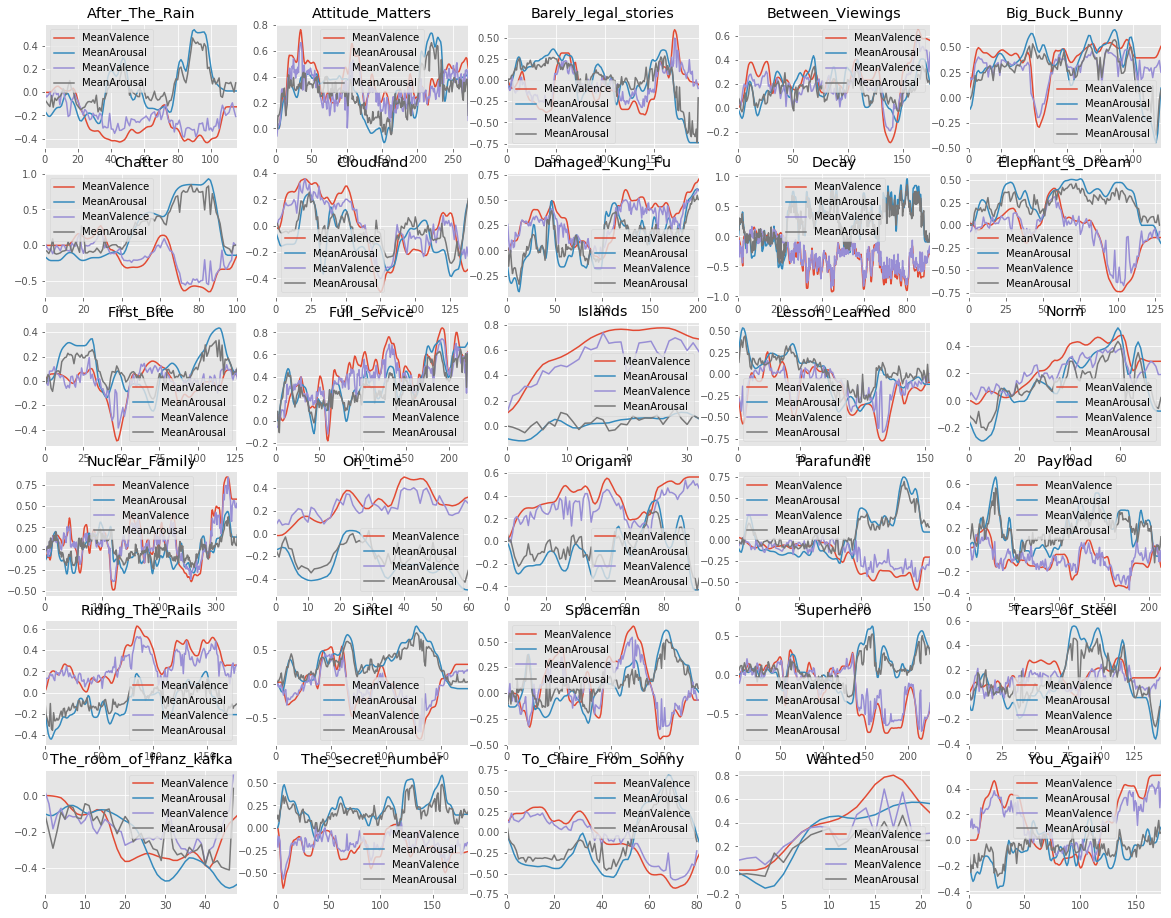

In [185]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    dfa = getAnnotationDf(mov)
    dfa[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    dev_set[mov][['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)



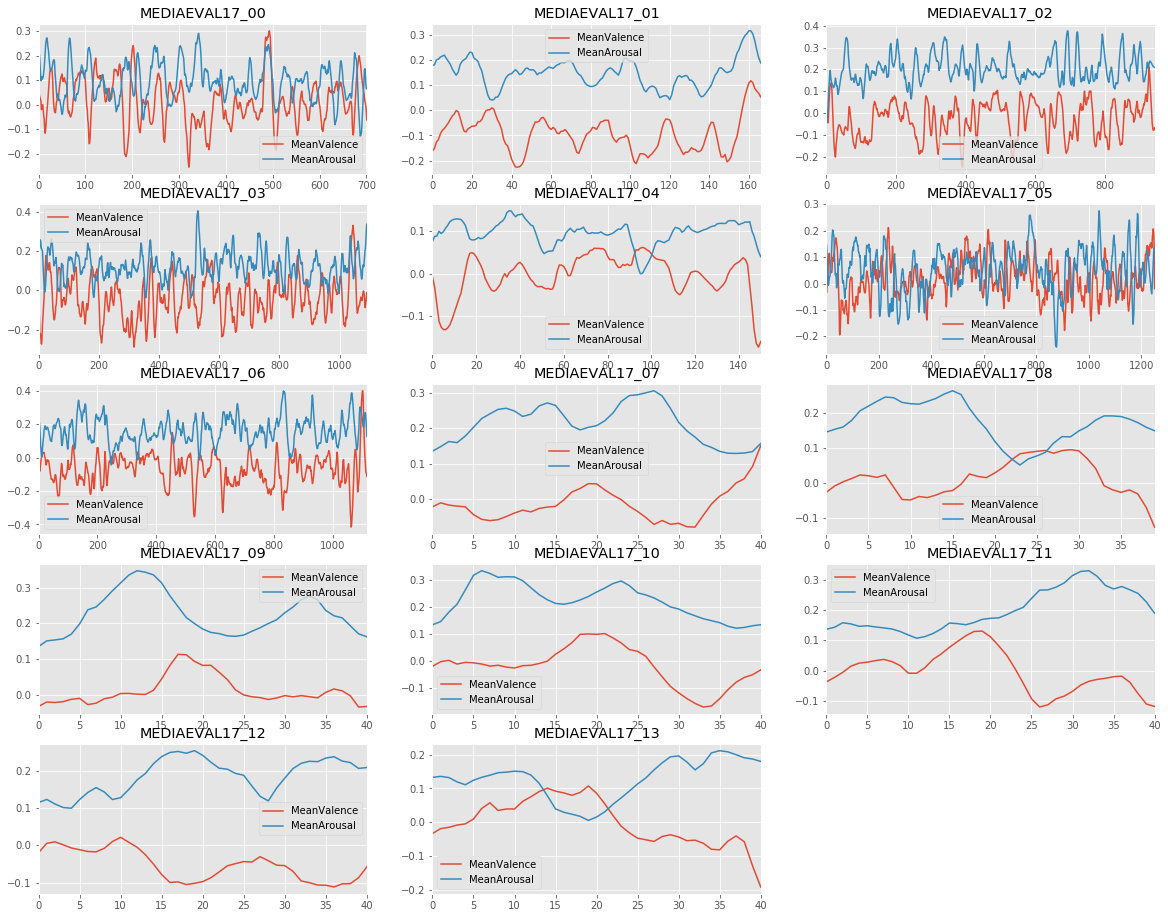

In [81]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(testmovieNames):
    plt.subplot(5,3,ii+1)
    itest_set[mov][['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)


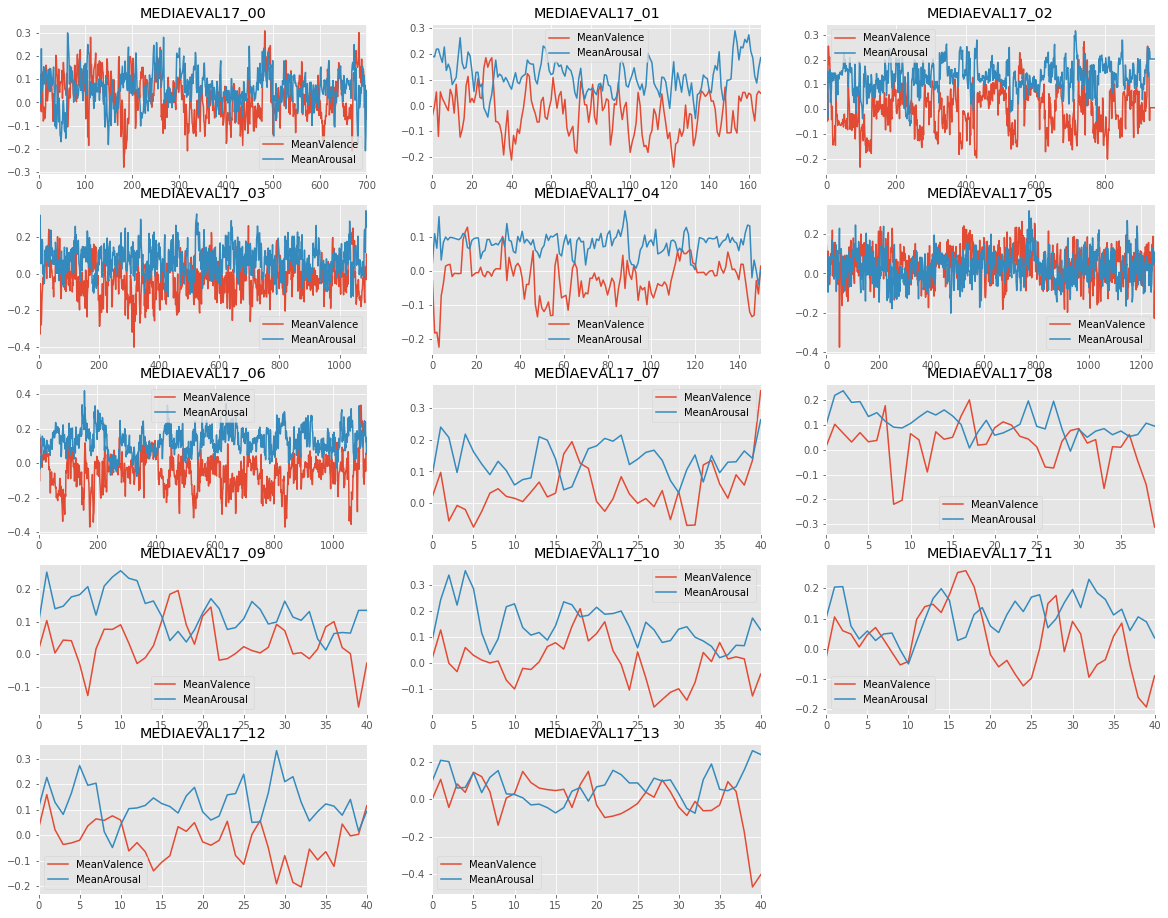

In [188]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(testmovieNames):
    plt.subplot(5,3,ii+1)
    test_set[mov][['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)



## Test 2- pipes with 2 groups

It looks like the pipe are successfully predict the movie "Decay", since it was in all the traiing sets.
however 


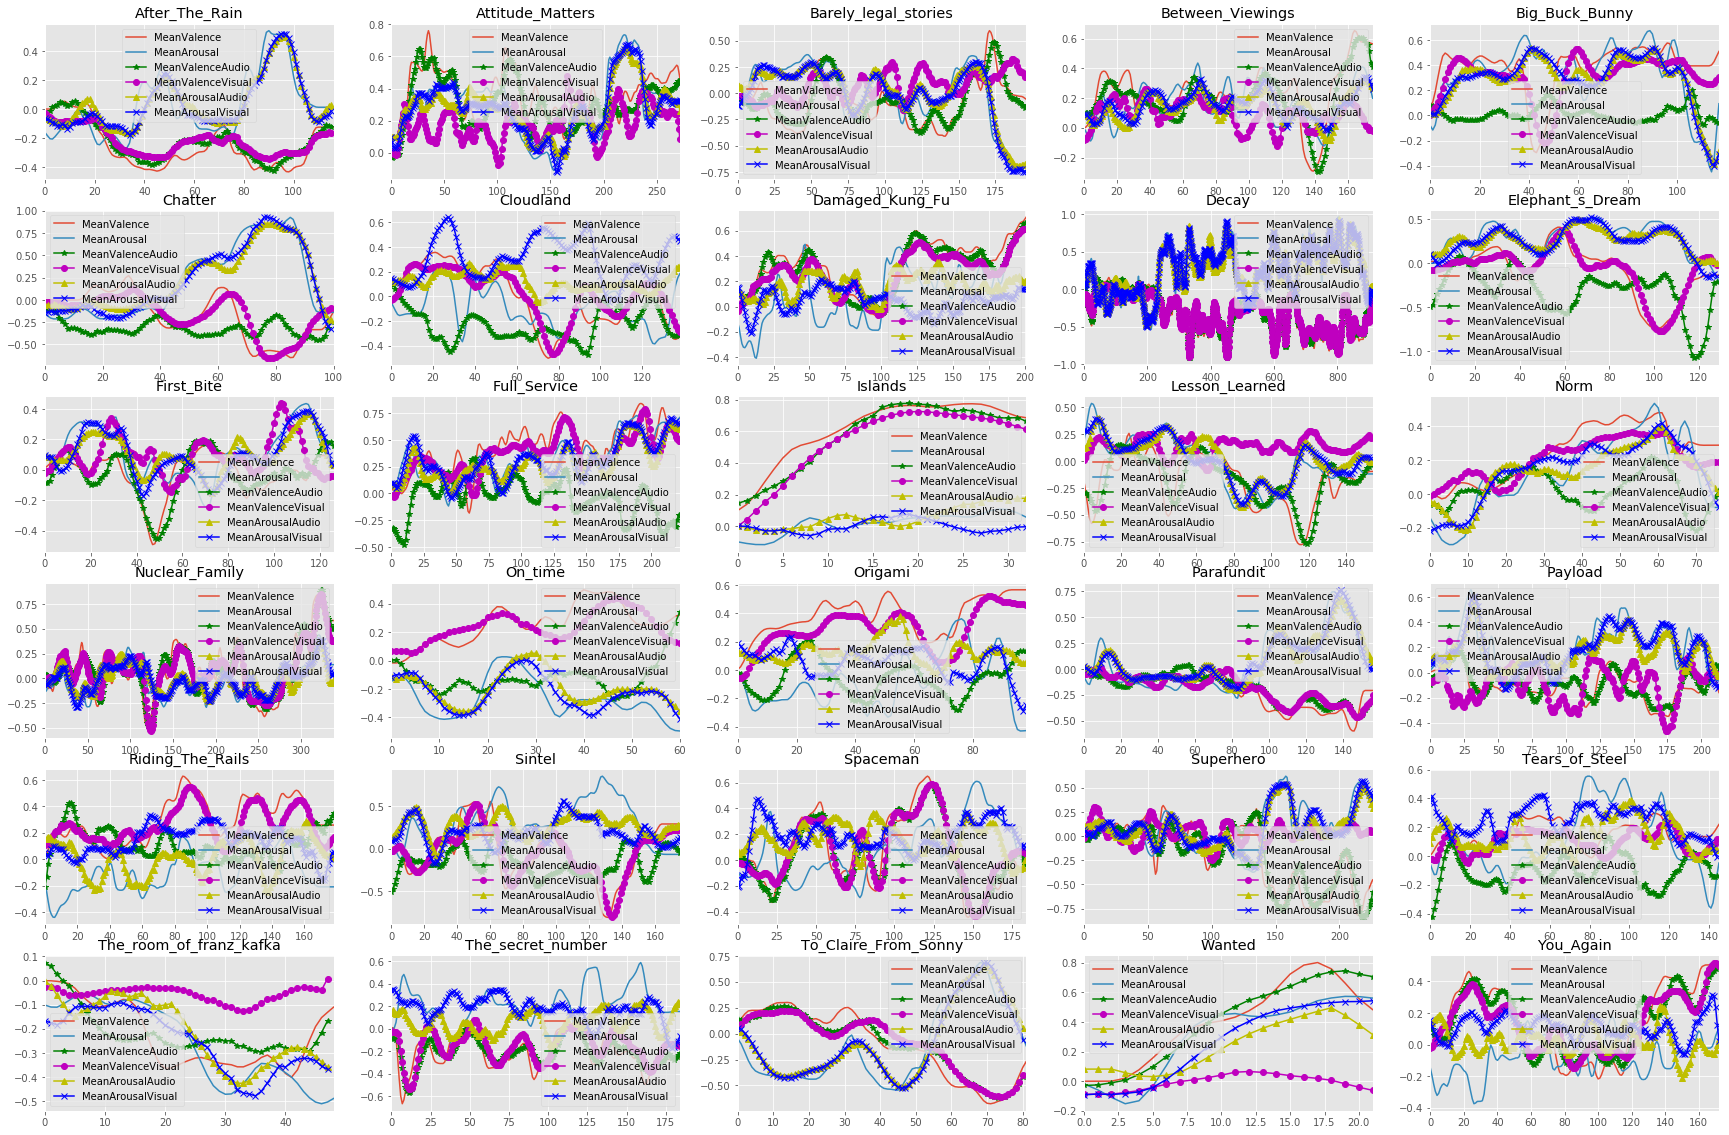

In [74]:
fix, axes = plt.subplots(figsize=(30,20))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    dfa = getAnnotationDf(mov)
    dfa[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    idev_set[mov].plot(ax=plt.gca(),title=mov,style=['g*-','mo-','y^-','bx-'])


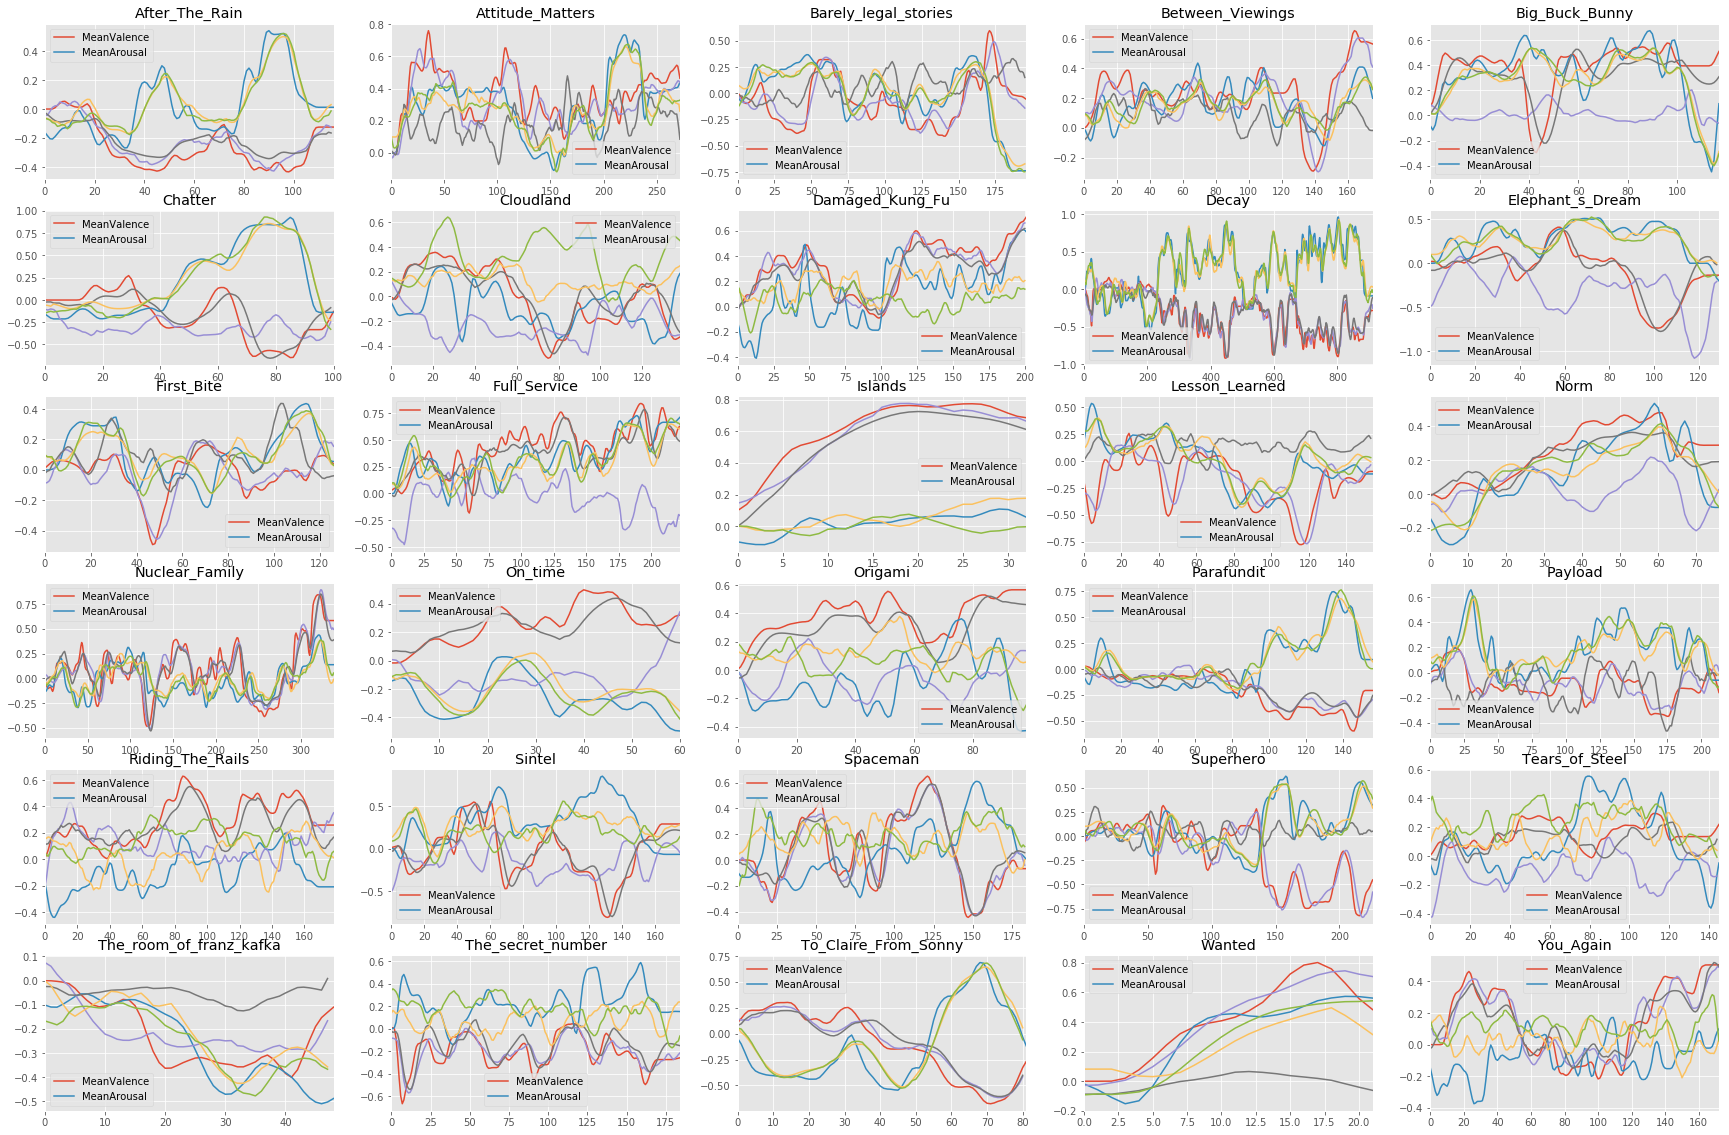

In [56]:
fix, axes = plt.subplots(figsize=(30,20))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    dfa = getAnnotationDf(mov)
    dfa[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    idev_set[mov].plot(ax=plt.gca(),title=mov,legend=None)


## this run have some bug related to pipes 

In [138]:
%%time
fname = 'me17ei_BOUNNKU_valence_arousal_1.txt'
fd = open(fname, 'w')
fd.close()

for f in testmovieNames:
    print(f)
    
    fd = open(fname, 'a')
    fd.write(f+'\n')  # python will convert \n to os.linesep
    fd.close()
    
    audiodf = getAudioDf(f,folder=med2017audiofolderTest)
    visualdf = getAvgVisFeatListDf(f,visual_feat_list,
                                   folder=med2017visualfolderTest)
    print(audiodf.shape,visualdf.shape)
    
    mlen = min(len(audiodf),len(visualdf))
    
    audiodf = audiodf[:mlen]
    visualdf = visualdf[:mlen]
    
    aa = pipe_audio_arousal.predict(audiodf)
    av = pipe_visual_arousal.predict(visualdf)
    arousal_scores = np.transpose([ aa,av ])
    arousal_scores = np.mean(arousal_scores,axis=1)
    
    va = pipe_audio_valence.predict(audiodf)
    vv = pipe_visual_valence.predict(visualdf)
    valence_scores = np.transpose([va,vv ])
    valence_scores = np.mean(valence_scores,axis=1)
    
    df =pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])
    df.to_csv(fname, sep=' ', index=False, header=False, mode='a')
    

MEDIAEVAL17_00
(702, 1583) (702, 1271)
MEDIAEVAL17_01
(167, 1583) (168, 1271)
MEDIAEVAL17_02
(943, 1583) (943, 1271)
MEDIAEVAL17_03
(1091, 1583) (1091, 1271)
MEDIAEVAL17_04
(151, 1583) (151, 1271)
MEDIAEVAL17_05
(1251, 1583) (1251, 1271)
MEDIAEVAL17_06
(1117, 1583) (1117, 1271)
MEDIAEVAL17_07
(41, 1583) (41, 1271)
MEDIAEVAL17_08
(40, 1583) (41, 1271)
MEDIAEVAL17_09
(41, 1583) (41, 1271)
MEDIAEVAL17_10
(41, 1583) (41, 1271)
MEDIAEVAL17_11
(41, 1583) (41, 1271)
MEDIAEVAL17_12
(41, 1583) (41, 1271)
MEDIAEVAL17_13
(41, 1583) (41, 1271)
CPU times: user 2min 53s, sys: 2.18 s, total: 2min 55s
Wall time: 2min 55s


In [116]:
df =pd.DataFrame(np.transpose([valence_scores, arousal_scores]), columns=['MeanValence','MeanArousal'])

In [125]:
df.to_csv('M00.txt', sep=' ', index=False, header=False, mode='a')

In [142]:
!ls m*

me17ei_BOUNNKU_valence_arousal_1.txt

models:
fear-audio-svm.pkl  fear-fusion-logisticreg.pkl  fear-visual-svm.pkl
